# **Book Recommendation System — Collaborative Filtering & Content-Based Approaches**

**Author:** Milos Saric [https://saricmilos.com/]  
**Date:** November 04, 2025 - November 18th, 2025  
**Dataset:** Kaggle — *Book Recommendation Dataset*  

---

This notebook explores the Kaggle Book Recommendation dataset to build intelligent book recommendation systems using both **collaborative filtering** and **content-based** techniques. 
 
**Objective:**  
To develop a personalized **book recommendation system** capable of understanding user preferences and providing meaningful, data-driven suggestions by integrating collaborative and content-based approaches.
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Define the recommendation goal: predicting user preferences and suggesting books they are most likely to enjoy. Establish appropriate evaluation metrics (Precision@K, Recall@K, RMSE, MAE for ratings prediction).  

2. **Data Collection & Overview** – Load and inspect datasets including `Books`, `Users`, and `Ratings` from Kaggle. Understand data structure, relationships, and key features.  

3. **Exploratory Data Analysis (EDA)** – Analyze rating distributions, user activity, popular books, and correlations between users and items. Visualize key insights through plots.

4. **Data Preprocessing & Feature Engineering** – Clean and merge datasets, handle missing values, normalize user IDs, and extract relevant metadata.  

5. **Model Development** –  
   - **Collaborative Filtering:** User-based and item-based similarity models using cosine correlation. 
   - **Content-Based Filtering:** Use TF-IDF or embeddings on book metadata (titles, authors) to find similar books.  
6. **Evaluation & Testing** – Evaluate recommendation quality using ranking-based metrics. Compare different approaches and interpret the top recommended books for sample users.  

7. **Deployment & Future Work** – Outline strategies to deploy the recommendation engine (via FastAPI).
---

# **About Recommender Systems**

Over the past few decades, platforms like YouTube, Amazon, and Netflix have made recommender systems an essential part of our online experience. Whether it’s suggesting movies to watch, products to buy, or articles to read, these systems help users discover content that matches their interests.

In simple terms, a recommender system is an algorithm that predicts what a user might like based on their preferences and behavior. They play a key role in many industries, not only improving user experience but also driving significant revenue and helping companies stand out from the competition.

---

## **1. Problem Definition**

The first step is to establish a clear understanding of the challenge we aim to solve. This phase lays the groundwork for the entire project and ensures all subsequent efforts remain aligned with the primary objective.

### **Objective**
Develop a **book recommendation system** that predicts and suggests books users are most likely to enjoy, based on their past interactions, ratings, and preferences.  
The system should intelligently recommend books by leveraging techniques such as **collaborative filtering** and **content-based filtering**.

### **Scope**
The analysis focuses on the Kaggle *Book Recommendation Dataset*, which includes three key components:  
- **Users** – demographic and identification information.  
- **Books** – metadata such as titles, authors, and publication details.  
- **Ratings** – explicit user feedback (ratings from 1–10).  

Predictions and recommendations are restricted to the dataset provided, without external sources unless explicitly integrated in advanced phases.

### **Stakeholders**
- **Readers / Users:** Receive personalized book suggestions based on reading habits and preferences.  
- **Publishers & Authors:** Gain insights into reader interests, helping target audiences more effectively.  
- **Data Scientists / ML Practitioners:** Experiment with various recommendation algorithms and performance optimization.  
- **Platform Developers / Businesses:** Improve user engagement, sales, retention, and satisfaction through smarter recommendations.  

### **Success Criteria**
Achieve **high-quality and personalized recommendations**, evaluated using metrics such as:  
- **Precision@K** and **Recall@K** — to measure recommendation relevance.  
- **RMSE / MAE** — for explicit rating prediction accuracy.  

A successful model will deliver **relevant, diverse, and accurate book suggestions** that enhance user experience and foster long-term engagement.

> A clearly defined problem sets the foundation for building a meaningful and effective recommendation system.

## **2. Data Collection**

The **Data Collection** phase focuses on gathering and preparing the datasets required to build and evaluate the book recommendation models. This step also involves importing essential libraries, setting up the working environment, and organizing reusable functions to ensure a smooth analysis workflow.

## **Dataset Description**

The **Book-Crossing Dataset** comprises three main files: **Users**, **Books**, and **Ratings**.  
Each file contains essential information used to build and evaluate the book recommendation system.

---

### **1. Users**

Contains user-related information.  
- **user_id** — Anonymized unique identifier for each user (mapped to integers).  
- **location** — User’s location information (typically “City, State, Country”).  
- **age** — User’s age (if available).  

> Note: Some demographic fields may contain `NaN` values if data was unavailable.

---

### **2. Books**

Contains metadata for each book.  
- **isbn** — Unique book identifier (invalid isbns have already been removed).  
- **book_title** — Title of the book.  
- **book_author** — Author name (only the first author is provided in multi-author cases).  
- **year_of_publication** — Year the book was published.  
- **publisher** — Publishing company.  
- **image_url_s / M / L** — URLs linking to small, medium, and large cover images hosted on Amazon.

> Content-based features such as book titles, authors, and publication years were obtained from **Amazon Web Services**.  

---

### **3. Ratings**

Contains user–book interaction data.  
- **user_id** — References a unique user.  
- **isbn** — References a unique book.  
- **book_rating** — Explicit or implicit feedback:  
  - **1–10** → Explicit ratings (higher values indicate stronger preference).  
  - **0** → Implicit feedback (user has interacted but not rated explicitly).

---

You can access the dataset through the following sources:

- **1.** Download directly from the Github repository: [https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets](https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets)  
- **2.** Download from Kaggle: [Book Recommendation Dataset — Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)  

Both sources provide the same data, so you can use whichever is most convenient for your workflow.

> This dataset serves as the backbone of the recommendation system, enabling the discovery of patterns between users and books, and supporting the development of intelligent, personalized recommendation algorithms.

We can begin by:
1. Loading each dataset (`Users`, `Books`, `Ratings`) individually.  
2. Performing exploratory data analysis (EDA) to understand distributions and missing values.  
3. Merging the datasets to form a unified view of user–book interactions.  
4. Building and evaluating different recommendation approaches. 

### Required Libraries Import

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
%load_ext autoreload
%autoreload 2

# Modules
from src.dataloader import load_all_csvs_from_folder
from src.preprocess_location import preprocess_location
from src.missing_values import (
    missing_values_heatmap,
    missing_values_barchart,
    get_missing_value_summary
    )
from src.unique_values import (
    get_column_types,
    plot_number_of_unique_values,
    unique_values
    )
from src.plots import (
    plot_top_categories,
    plot_boxplot,
    plot_histogram
    )

In [3]:
# Core
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We begin by loading our datasets and cleaning column names for consistency.  
Specifically, we:

- Remove leading and trailing spaces
- Convert all names to lowercase
- Replace dashes (`-`) with underscores (`_`)

This makes the DataFrame easier to work with in subsequent analysis.

In [4]:
dataset_folder = Path(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\datasets")

In [5]:
datasets = load_all_csvs_from_folder(dataset_folder,low_memory=False)

In [6]:
print(f"{datasets.keys()}")

dict_keys(['Books', 'Ratings', 'Users'])


In [7]:
books_df, ratings_df, users_df = (datasets.get(key) for key in ["Books", "Ratings", "Users"])

We remove leading/trailing spaces, convert all names to lowercase, and replace dashes with underscores. This makes the DataFrame easier to work with in subsequent analysis.


In [8]:
for df in [books_df, ratings_df, users_df]:
    df.columns = (
        df.columns
        .str.strip()            # Remove leading/trailing whitespace
        .str.lower()            # Convert all column names to lowercase
        .str.replace('-', '_', regex=False)  # Replace hyphens with underscores
    )

##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

In [9]:
shapes = pd.DataFrame({
    "Dataset": ["books_df", "ratings_df","users_df"],
    "Shape": [books_df.shape, ratings_df.shape,users_df.shape]
})
print(shapes.to_string(index=False))

   Dataset        Shape
  books_df  (271360, 8)
ratings_df (1149780, 3)
  users_df  (278858, 3)


# **3.1. Books Dataset**

### **3.1.1. Basic Information**

In [10]:
original_books_df = books_df

- There are **271,360 book entries** total.
- The `isbn` field has only unique values as rows, meaning each book is uniquely identified by its ISBN.
- `book_title` is *not unique* — only 242,135 unique titles, meaning some books share the same title (likely due to different editions). Selected Poems appear 27 times with different ISBN.
- `book_author` has 102,022 unique names indicating several authors wrote multiple books.
- The `year_of_publication` column has **118 unique years**, with **2002** being the most frequent (17,627 books).
- The `publisher` column has **16,807 unique publishers**, with **Harlequin** being the most common with 7535 published books.

In [11]:
books_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
books_df.describe()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,17627,7535,2,2,2


We can remove columns which contain book covers link images.

In [14]:
book_cover_image_urls = books_df[["image_url_s", "image_url_m", "image_url_l"]]

In [15]:
books_df = books_df.drop(columns= ["image_url_s","image_url_m","image_url_l"])

### **3.1.2. Missing Values Information**

In [16]:
books_df.isna().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64

In [17]:
na_counts_books = books_df.isna().sum().reset_index()
na_counts_books.columns = ['Feature', 'MissingValues']

In [18]:
print(f"{na_counts_books}")

               Feature  MissingValues
0                 isbn              0
1           book_title              0
2          book_author              2
3  year_of_publication              0
4            publisher              2


In [19]:
get_missing_value_summary(books_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,isbn,object,271360,0,271360,0.000000
1,book_title,object,271360,0,271360,0.000000
2,book_author,object,271360,2,271358,0.000737
3,year_of_publication,object,271360,0,271360,0.000000
4,publisher,object,271360,2,271358,0.000737


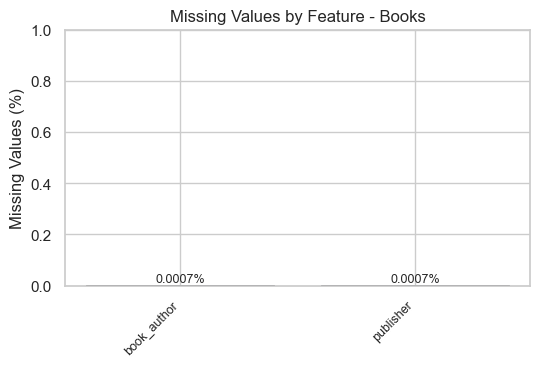

book_author    0.000737
publisher      0.000737
dtype: float64

In [20]:
missing_values_barchart(books_df,"Books")

### **3.1.3. Unique Values Information**

### Book Metadata Overview

The dataset contains **271,360 books**, each described by several key attributes. All attributes are object type. Here’s what we can observe:

- **`isbn`** – Every book has a unique ISBN, which makes it a perfect **unique identifier** for our dataset. 
- **`book_title`** – There are **242,135 unique titles** (about **89%** of total entries). This means most titles are unique, though some duplicates exist — likely due to **different editions or reissues** of the same book.  
- **`book_author`** – Around **102,022 unique authors** are present, meaning each author has, on average, **2–3 books** in the dataset.  
- **`publisher`** – Only **16,807 unique publishers** appear, or roughly **6%** of entries. This makes sense, since **many books come from the same publisher**.  
- **`year_of_publication`** – There are just **118 distinct years**, which is expected because **many books share the same publication year**.

---

Overall, the dataset shows good consistency, **ISBNs are unique**, while other fields naturally repeat due to multiple books by the same authors, publishers, or publication years.


In [21]:
cat_cols_books, int_cols_books, float_cols_books = get_column_types(books_df)

Categorical variables:
['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher']

Integer variables:
[]

Real (float) variables:
[]


In [22]:
unique_values(books_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,isbn,271360,271360,100.00
1,book_title,242135,271360,89.23
2,book_author,102022,271360,37.60
3,publisher,16807,271360,6.19
4,year_of_publication,118,271360,0.04


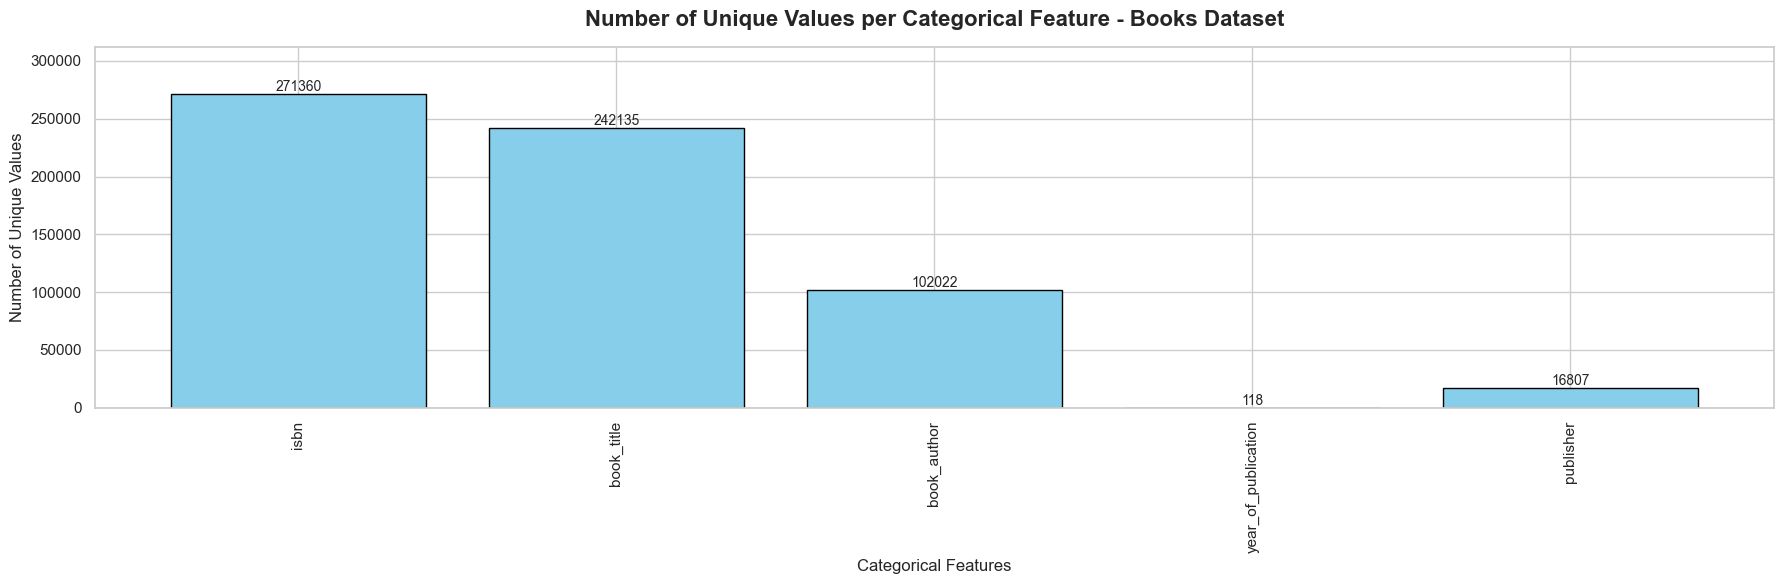

In [23]:
plot_number_of_unique_values(books_df,cat_cols_books,"Books Dataset")

We further explored the dataset by plotting value counts and found that the authors with the most published books are Agatha Christie (632), William Shakespeare (567), Stephen King (524), Ann M. Martin (423), and Carolyn Keene (373). The publishers with the most books are Harlequin (7,535), Silhouette (4,220), Pocket (3,905), and Ballantine Books (3,783).

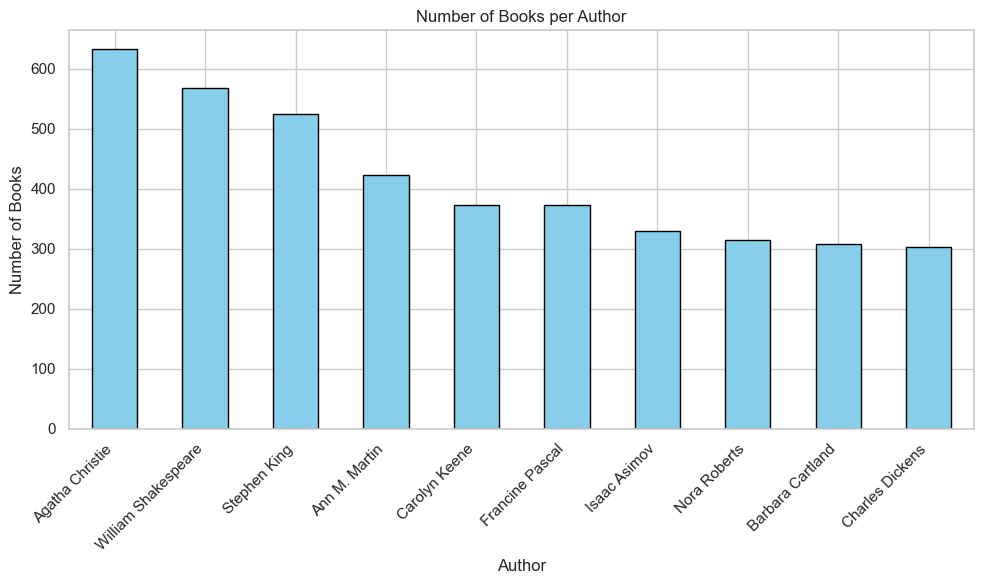

In [24]:
# Count how many times each author appears
author_counts = books_df['book_author'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
author_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Books per Author")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Adjust layout so labels fit
plt.show()

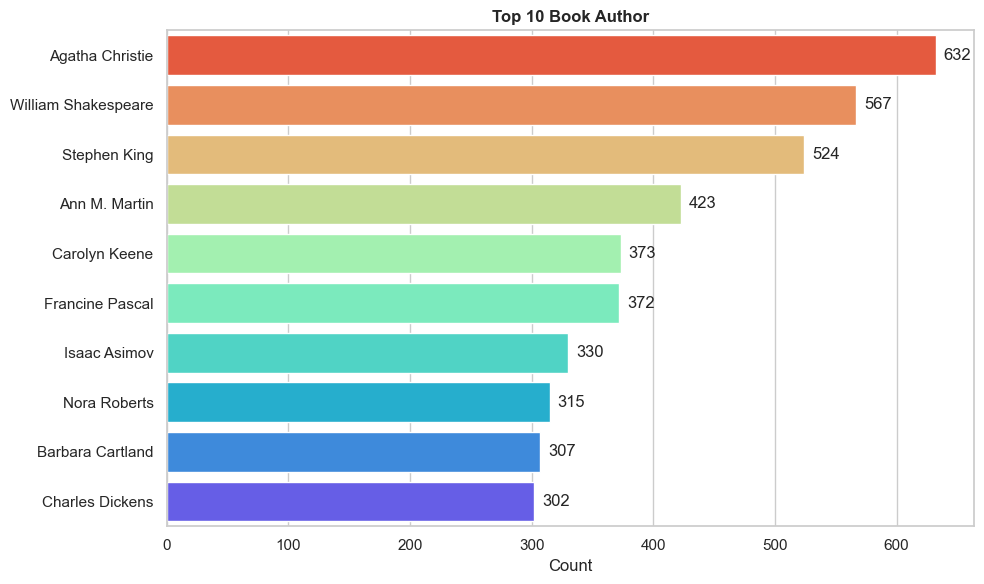

In [25]:
plot_top_categories(books_df, 'book_author', top_n=10, orientation='h', palette='rainbow_r')

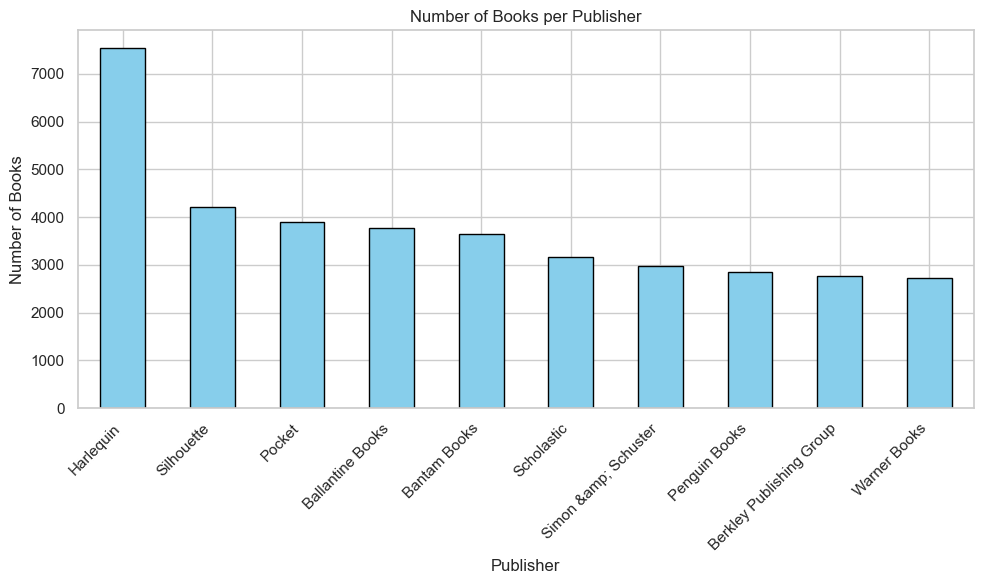

In [26]:
# Count how many times each author appears
publisher_counts = books_df['publisher'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
publisher_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Books per Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Adjust layout so labels fit
plt.show()

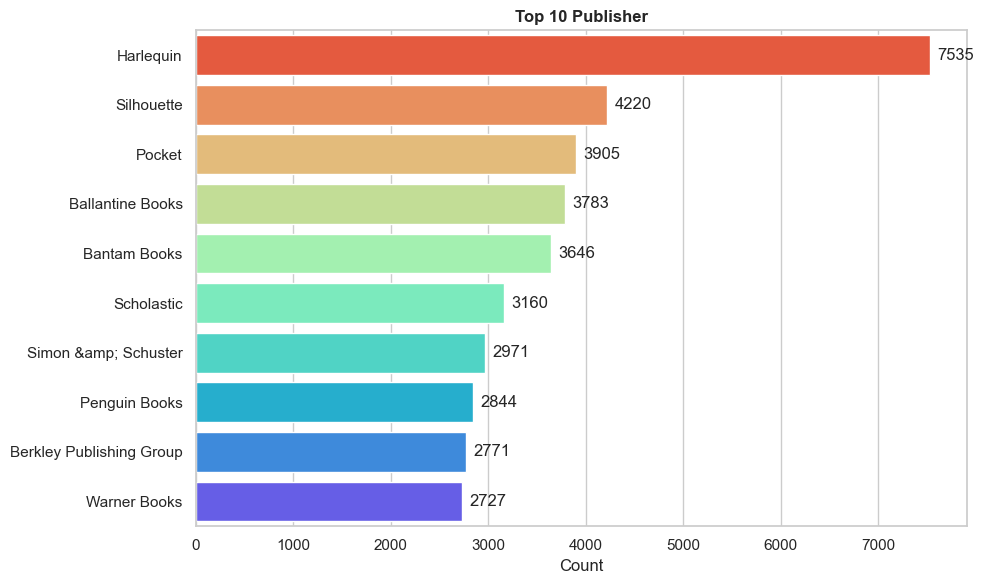

In [27]:
plot_top_categories(books_df, 'publisher', top_n=10, orientation='h', palette='rainbow_r')

# **3.2. Ratings Dataset**

### **3.2.1. Basic Information**

In [28]:
original_ratings_df = ratings_df

Our ratings dataset contains three columns: `user_id`, `isbn`, and `book_rating`, with approximately **1,149,780 entries**.  
There are **no missing values**. The `user_id` column is just an identifier, so statistics like mean or standard deviation are not meaningful.

The `book_rating` column ranges from **0** (book read but not rated) to **10**, with a **mean of 2.87** and a **standard deviation of 3.85**, indicating high variability.  
About **50% of ratings are 0** and **75% are below 7**, showing a **sparse ratings matrix** typical of recommendation datasets.

**Data types:**
- `isbn` → categorical  
- `user_id` → integer  
- `book_rating` → integer  

**Unique values:**
- `isbn`: 340,556 (~30%)  
- `user_id`: 105,283 (~9%)  
- `book_rating`: 11 (0–10)


In [29]:
ratings_df.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [31]:
ratings_df.describe()

,user_id,book_rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### **3.2.2. Missing Values Information**

Rating Dataframe has NO missing values!

In [32]:
ratings_df.isna().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [33]:
na_counts_ratings = ratings_df.isna().sum().reset_index()
na_counts_ratings.columns = ['Feature', 'MissingValues']

In [34]:
print(f"{na_counts_ratings}")

       Feature  MissingValues
0      user_id              0
1         isbn              0
2  book_rating              0


In [35]:
get_missing_value_summary(ratings_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,user_id,int64,1149780,0,1149780,0.0
1,isbn,object,1149780,0,1149780,0.0
2,book_rating,int64,1149780,0,1149780,0.0


### **3.2.3. Unique Values Information**

In [36]:
cat_cols_ratings, int_cols_ratings, float_cols_ratings = get_column_types(ratings_df)

Categorical variables:
['isbn']

Integer variables:
['user_id', 'book_rating']

Real (float) variables:
[]


In [37]:
unique_values(ratings_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,isbn,340556,1149780,29.62
1,user_id,105283,1149780,9.16
2,book_rating,11,1149780,0.00


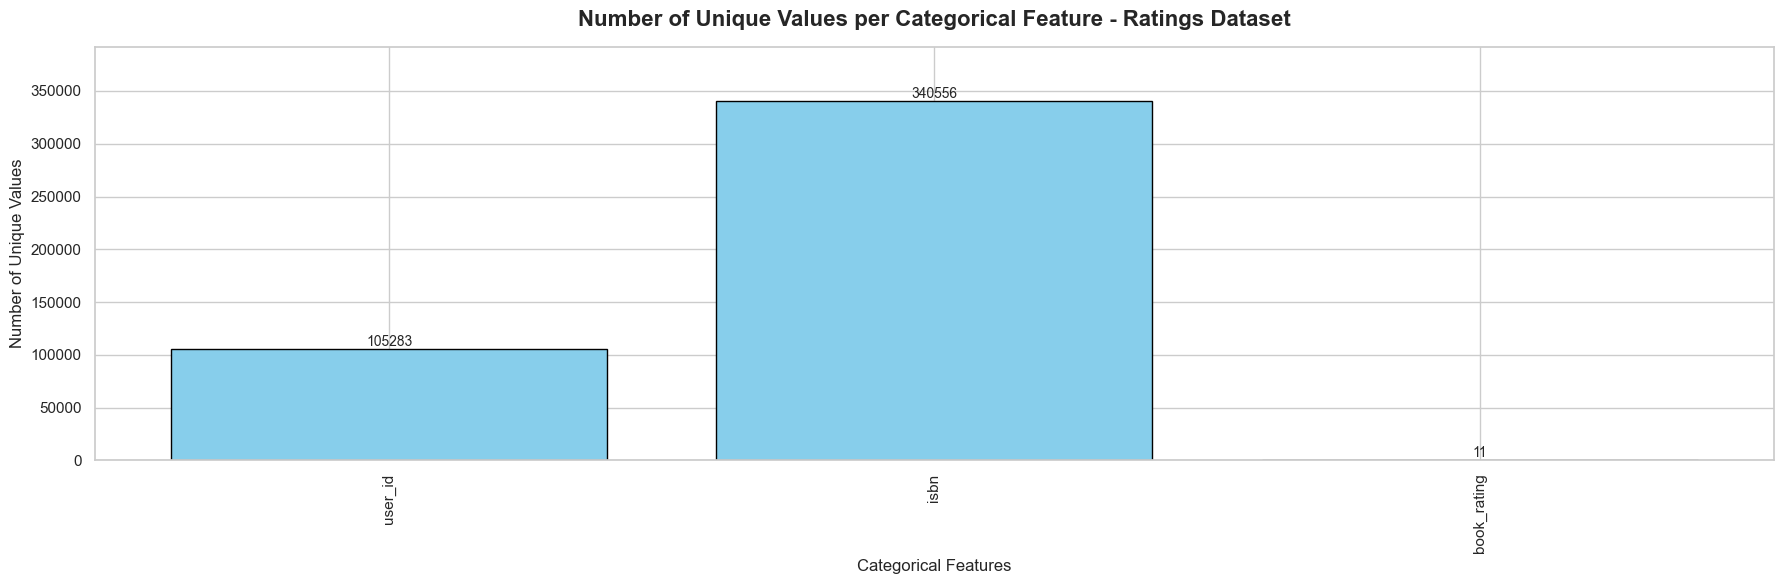

In [38]:
plot_number_of_unique_values(ratings_df,ratings_df.columns,"Ratings Dataset")

In [39]:
ratings_df["book_rating"].value_counts()

book_rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

The histogram shows the distribution of user ratings for books. A large number of users (716,109) did not provide a rating, which reflects real-life behavior—most people enjoy a product and move on without leaving an online review. While this is natural, it poses a challenge for collaborative recommendation systems, as unrated items result in zero-length vectors and sparse data. For user-based filtering, new users with few or no ratings make it hard to find similar users. For item-based filtering, new books with few ratings are difficult to recommend, leading to the cold start problem and sparse data issues.

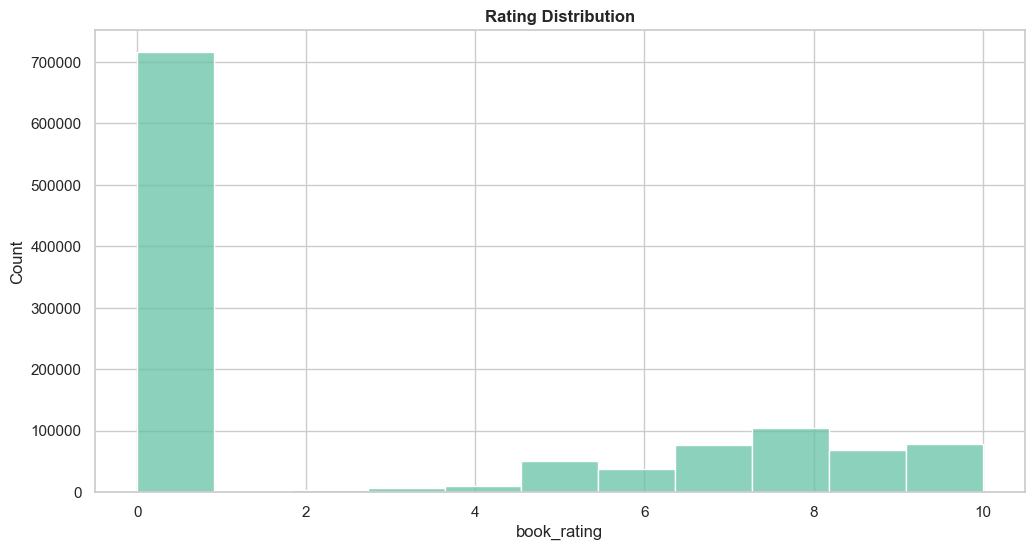

In [40]:
plot_histogram(ratings_df, 'book_rating', bins=11, title='Rating Distribution')

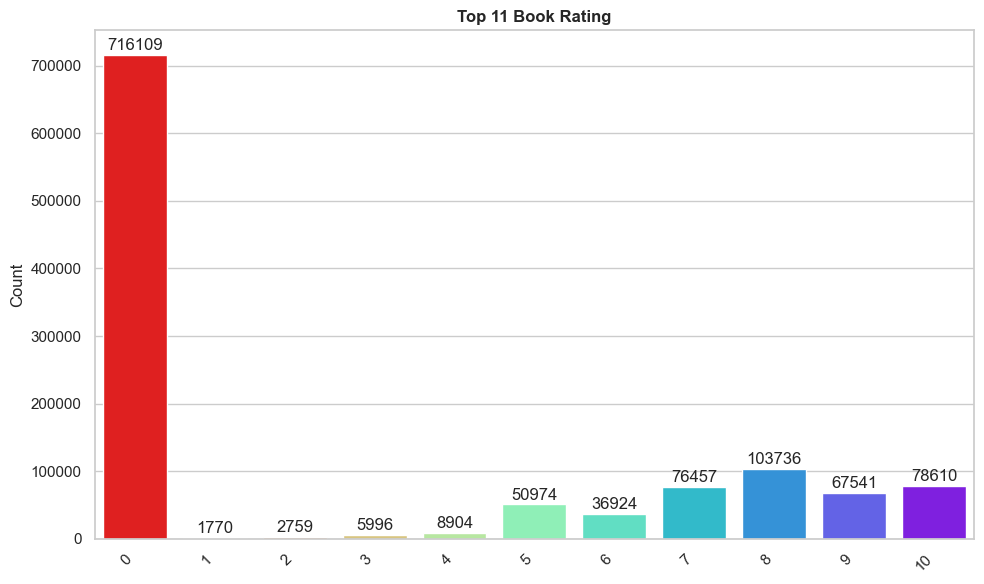

In [41]:
plot_top_categories(ratings_df, 'book_rating', top_n=11, orientation='v', palette='rainbow_r')

# **3.3. Users Dataset**

### **3.3.1. Basic Information**

In [42]:
original_users_df = users_df

In [43]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


We start by preprocessing the `location` column in the user dataset.  
User-entered locations are often messy — with typos, alternate spellings, subregions, or single-entry countries.  
Our goal is to **standardize and simplify** these values.

---

###  Location Preprocessing Functions

- **`split_location(df)`**  
  Splits the `location` column into `city`, `state`, and `country`, trims whitespace, and fills missing values with `'unknown'`.

- **`clean_country(df, country_mapping, region_mapping)`**  
  Standardizes country names, groups rare countries into `'other'`, removes quotes and empty strings, maps each country to a region, and drops the original `country` column.

- **`clean_city(df, top_n=50)`**  
  Cleans city names, replaces invalid or missing entries with `'unknown'`, keeps only the top *N* frequent cities, labels the rest as `'other'`, and drops the original column.

- **`clean_state(df, top_n=50)`**  
  Similar to `clean_city`, but applied to states.

- **`preprocess_location(df, ...)`**  
  Runs all the above steps and returns cleaned columns:  
  `city_clean`, `state_clean`, `country_clean`, and `region`.

---

Overall, this process transforms messy location data into standardized, manageable categories suitable for **analysis or modeling**.


In [44]:
country_mapping = {
    # USA variants
    'usa': 'usa', 'u.s.a.': 'usa', 'us': 'usa', 'america': 'usa', 'u.s.a': 'usa',
    'united states': 'usa', 'united states of america': 'usa', 'united state': 'usa', 
    'united statea': 'usa', 'u.s. of a.': 'usa', 'u.s>': 'usa', 'uusa': 'usa',
    'usa now': 'usa', 'good old usa !': 'usa', 'good old u.s.a.': 'usa',
    'usa (currently living in england)': 'usa', 'usa"': 'usa', 'us virgin islands': 'usa',
    'american samoa': 'usa', 'ca': 'usa', 'nyc': 'usa', 'fl': 'usa', 'tx': 'usa',
    'arizona': 'usa', 'california': 'usa', 'new york': 'usa', 'massachusetts': 'usa',
    'ohio': 'usa', 'colorado': 'usa', 'michigan': 'usa', 'virginia': 'usa',
    'washington': 'usa', 'missouri': 'usa', 'pennsylvania': 'usa', 'illinois': 'usa',
    'nevada': 'usa', 'florida': 'usa', 'north carolina': 'usa', 'south carolina': 'usa',
    'west virginia': 'usa', 'maine': 'usa', 'minnesota': 'usa', 'montana': 'usa',
    'new jersey': 'usa', 'hawaii': 'usa', 'alaska': 'usa', 'texas': 'usa',
    'louisiana': 'usa', 'oh': 'usa', 'nj': 'usa', 'ny': 'usa', 'va': 'usa',
    'pa': 'usa', 'arizona': 'usa', 'florida': 'usa', 'mi': 'usa', 'california': 'usa',
    'anystate': 'usa', 'everywhere and anywhere': 'usa', 'land of the free': 'usa',
    
    # UK variants
    'uk': 'united kingdom', 'u.k.': 'united kingdom', 'england': 'united kingdom',
    'england uk': 'united kingdom', 'united kingdom': 'united kingdom', 'scotland': 'united kingdom',
    'wales': 'united kingdom', 'northern ireland': 'united kingdom',
    
    # Germany variants
    'germany': 'germany', 'deutschland': 'germany', 'germay': 'germany', 'deutsches reich': 'germany',
    'baden-wuerttemberg': 'germany', 'baden-württemberg': 'germany', 'hessen': 'germany',
    'rheinland-pfalz': 'germany', 'bayern': 'germany', 'berlin': 'germany',
    
    # Spain variants
    'spain': 'spain', 'españa': 'spain', 'espana': 'spain', 'espã±a': 'spain', 
    'spain"': 'spain', 'andalucia': 'spain', 'catalunya': 'spain', 'catalonia': 'spain',
    'pais vasco': 'spain', 'valtesse': 'spain', 'laos': 'spain', 'aragon': 'spain',
    
    # Italy variants
    'italy': 'italy', 'italia': 'italy', 'l`italia': 'italy', 'italien': 'italy',
    'italy"': 'italy', 'emilia romagna': 'italy', 'lazio': 'italy', 'sicilia': 'italy',
    'veneto': 'italy', 'toscana': 'italy', 'piemonte': 'italy', 'roma': 'italy', 'milano': 'italy',
    'prov. di milano': 'italy', 'trentino alto adige': 'italy', 'roma': 'italy',
    
    # France variants
    'france': 'france', 'la france': 'france', 'france"': 'france', 'ile de france': 'france',
    'bourgogne': 'france', 'alsace': 'france',
    
    # Portugal variants
    'portugal': 'portugal', 'portugal"': 'portugal', 'alentejo': 'portugal',
    'lisboa': 'portugal', 'porto': 'portugal', 'coimbra': 'portugal', 'azores': 'portugal',
    
    # China variants
    'china': 'china', 'p.r.china': 'china', 'p.r. china': 'china', 'people`s republic of china': 'china',
    'china people`s republic': 'china', 'cn': 'china', 'china"': 'china', 'beijing': 'china',
    'shanghai': 'china', 'liaoning': 'china', 'shanxi province': 'china', 'hubei province': 'china',
    'hunan': 'china', 'guangdong': 'china', 'shandong province': 'china', 'hebei': 'china',
    
    # Australia variants
    'australia': 'australia', 'autralia': 'australia', 'australii': 'australia',
    'australian capital territory': 'australia', 'new south wales': 'australia', 'nsw': 'australia',
    'victoria': 'australia', 'queensland': 'australia', 'western australia': 'australia',
    'south australia': 'australia', 'tasmania': 'australia', 'canberra': 'australia',
    
    # India variants
    'india': 'india', 'india"': 'india', 'maharashtra': 'india', 'maharastra': 'india',
    'jharkhand': 'india', 'punjab': 'india', 'tamil nadu': 'india', 'indiai': 'india',
    
    # Japan variants
    'japan': 'japan', 'japan military': 'japan', 'japan"': 'japan', 'tokyo': 'japan',
    'osaka': 'japan', 'seoul korea': 'japan', 'shizuoka pref.': 'japan',
    
    # Misc / Other countries (examples)
    'canada': 'canada', 'british columbia': 'canada', 'ontario': 'canada', 'newfoundland': 'canada',
    'mexico': 'mexico', 'mexico"': 'mexico', 'ciudad de mexico': 'mexico', 'nuevo leon': 'mexico',
    'venezuela': 'venezuela', 'venezuela"': 'venezuela', 'brazil': 'brazil', 'brasil': 'brazil',
    'brazil"': 'brazil', 'argentina': 'argentina', 'la argentina': 'argentina', 'argentina"': 'argentina',
    'germany"': 'germany', 'deutschland"': 'germany', 'spain"': 'spain',
    'south korea': 'south korea', 'south korea"': 'south korea', 'korea': 'south korea', 's.corea': 'south korea',
    
    # Catch all N/A or unknown
    'n/a': 'unknown', 'n/a"': 'unknown', 'none': 'unknown', 'unknown': 'unknown', '"': 'unknown', '-': 'unknown',
    '.': 'unknown', '*': 'unknown',
}

In [45]:
region_mapping = {
    # North America
    'usa': 'North America',
    'canada': 'North America',
    'mexico': 'North America',
    'bahamas': 'North America',
    'puerto rico': 'North America',
    'bermuda': 'North America',
    'dc': 'North America',
    'oregon': 'North America',  # US state
    'u.s.a': 'North America',
    
    # Central America & Caribbean
    'costa rica': 'Central America',
    'panama': 'Central America',
    'guatemala': 'Central America',
    'jamaica': 'Caribbean',
    'trinidad and tobago': 'Caribbean',
    'dominican republic': 'Caribbean',
    'grenada': 'Caribbean',
    'barbados': 'Caribbean',
    
    # South America
    'brazil': 'South America',
    'argentina': 'South America',
    'chile': 'South America',
    'colombia': 'South America',
    'peru': 'South America',
    'venezuela': 'South America',
    'bolivia': 'South America',
    'uruguay': 'South America',
    'ecuador': 'South America',
    'paraguay': 'South America',
    'urugua': 'South America',  # typo
    
    # Europe
    'united kingdom': 'Europe',
    'germany': 'Europe',
    'spain': 'Europe',
    'italy': 'Europe',
    'france': 'Europe',
    'portugal': 'Europe',
    'netherlands': 'Europe',
    'switzerland': 'Europe',
    'sweden': 'Europe',
    'finland': 'Europe',
    'belgium': 'Europe',
    'ireland': 'Europe',
    'poland': 'Europe',
    'greece': 'Europe',
    'romania': 'Europe',
    'croatia': 'Europe',
    'slovakia': 'Europe',
    'czech republic': 'Europe',
    'russia': 'Europe/Asia',
    'yugoslavia': 'Europe',
    'slovenia': 'Europe',
    'luxembourg': 'Europe',
    'hungary': 'Europe',
    'iceland': 'Europe',
    'andorra': 'Europe',
    'ukraine': 'Europe',
    'lithuania': 'Europe',
    'latvia': 'Europe',
    'malta': 'Europe',
    'albania': 'Europe',
    'macedonia': 'Europe',
    'cyprus': 'Europe',
    'belarus': 'Europe',
    'estonia': 'Europe',
    'austria': 'Europe',
    'austria"': 'Europe',  # in case of trailing quotes
    
    # Asia
    'china': 'Asia',
    'japan': 'Asia',
    'south korea': 'Asia',
    'taiwan': 'Asia',
    'hong kong': 'Asia',
    'india': 'Asia',
    'malaysia': 'Asia',
    'singapore': 'Asia',
    'philippines': 'Asia',
    'indonesia': 'Asia',
    'pakistan': 'Asia',
    'iran': 'Asia',
    'thailand': 'Asia',
    'vietnam': 'Asia',
    'nepal': 'Asia',
    'kazakhstan': 'Asia',
    'afghanistan': 'Asia',
    'brunei': 'Asia',
    'u.a.e': 'Middle East',
    'united arab emirates': 'Middle East',
    'qatar': 'Middle East',
    'kuwait': 'Middle East',
    'bahrain': 'Middle East',
    'oman': 'Middle East',
    'iraq': 'Middle East',
    'sri lanka': 'Asia',
    'burma': 'Asia',
    
    # Africa
    'south africa': 'Africa',
    'ghana': 'Africa',
    'egypt': 'Africa',
    'algeria': 'Africa',
    'kenya': 'Africa',
    'zimbabwe': 'Africa',
    'ethiopia': 'Africa',
    'mozambique': 'Africa',
    'benin': 'Africa',
    'morocco': 'Africa',
    'mauritius': 'Africa',
    
    # Oceania
    'australia': 'Oceania',
    'new zealand': 'Oceania',
    'fiji': 'Oceania',
    
    # Other / Unknown / Misc
    'unknown': 'Unknown',
    'other': 'Unknown',
    'antarctica': 'Other',
    'east africa': 'Africa',
    'caribbean sea': 'Other',
    'euskal herria': 'Europe',  # Basque Country (Spain/France)
}


In [46]:
users_df = preprocess_location(users_df,country_mapping=country_mapping,region_mapping=region_mapping,top_cities= 50,top_states= 50)

In [47]:
users_df = users_df.drop(columns="location")

### User Description

The dataset includes **278,858 total users**, but only **168,096 have a recorded age** — meaning around **110,000 users didn’t provide their age**.

The **average user ID** (139,429.5) doesn’t carry much meaning since it’s just an identifier.  
The **average age** is about **35 years**, with a **standard deviation of roughly 14 years**, suggesting a fairly wide age spread among users.

Looking at the distribution:
- The **youngest recorded age is 0**, which is clearly an invalid or missing entry.  
- **25% of users are younger than 24**, and **half are younger than 32**.  
- **75% of users are younger than 44**, meaning most users fall between their mid-20s and mid-40s.  
- The **maximum recorded age is 244**, which is obviously an outlier or data error.

Overall, the age data contains some missing and unrealistic values, but most users are in the **24–44 age range**, with an average age around **35**.


In [48]:
users_df.head()

,user_id,age,country_clean,region,city_clean,state_clean
0,1,NaN,usa,North America,other,new york
1,2,18.0,usa,North America,other,california
2,3,NaN,russia,Europe/Asia,other,other
3,4,17.0,portugal,Europe,other,other
4,5,NaN,united kingdom,Europe,other,other


In [49]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        278858 non-null  int64  
 1   age            168096 non-null  float64
 2   country_clean  278858 non-null  object 
 3   region         278858 non-null  object 
 4   city_clean     278858 non-null  object 
 5   state_clean    278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


In [50]:
users_df.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### **3.3.2. Missing Values Information**

Most columns are complete, except for `age`, which has a significant number of missing entries.

In [51]:
users_df.isna().sum()

user_id               0
age              110762
country_clean         0
region                0
city_clean            0
state_clean           0
dtype: int64

In [52]:
na_counts_users = users_df.isna().sum().reset_index()
na_counts_users.columns = ['Feature', 'MissingValues']

In [53]:
print(f"{na_counts_users}")

         Feature  MissingValues
0        user_id              0
1            age         110762
2  country_clean              0
3         region              0
4     city_clean              0
5    state_clean              0


In [54]:
get_missing_value_summary(users_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,user_id,int64,278858,0,278858,0.000000
1,age,float64,278858,110762,168096,39.719857
2,country_clean,object,278858,0,278858,0.000000
3,region,object,278858,0,278858,0.000000
4,city_clean,object,278858,0,278858,0.000000
5,state_clean,object,278858,0,278858,0.000000


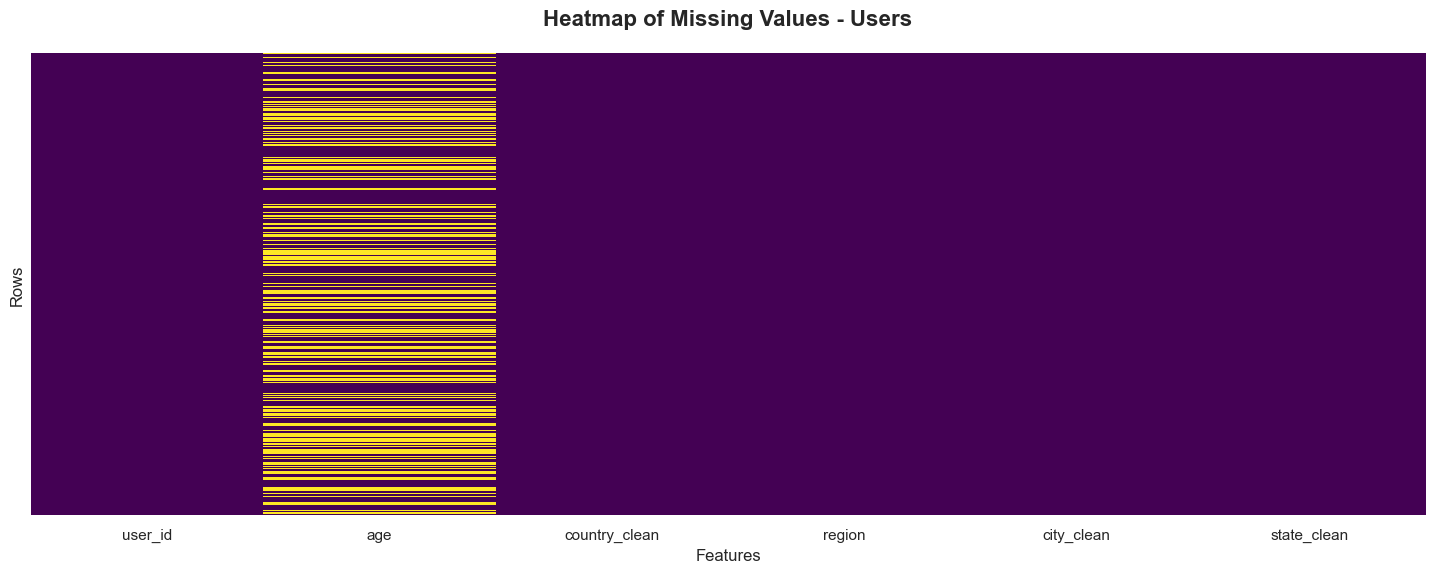

In [55]:
missing_values_heatmap(users_df,"Users")

In [56]:
users_df[users_df['age'].isnull()]

,user_id,age,country_clean,region,city_clean,state_clean
0,1,NaN,usa,North America,other,new york
2,3,NaN,russia,Europe/Asia,other,other
4,5,NaN,united kingdom,Europe,other,other
6,7,NaN,usa,North America,washington,other
7,8,NaN,canada,North America,other,ontario
...,...,...,...,...,...,...
278849,278850,NaN,italy,Europe,other,lombardia
278853,278854,NaN,usa,North America,portland,oregon
278855,278856,NaN,canada,North America,other,ontario
278856,278857,NaN,usa,North America,other,tennessee


### **3.3.3. Unique Values Information**

- `user_id` is fully unique (100%), serving as a unique identifier for each user.  
- `age` has 165 unique values (~0.06%), indicating outliers.  
- `country_clean` has 131 unique entries (~0.05%), `city_clean` 51 (~0.02%), and `state_clean` 50 (~0.02%).  
- `region` is the least varied with only 13 unique values (~0.00%).  

In [57]:
cat_cols_users, int_cols_users, float_cols_users = get_column_types(users_df)

Categorical variables:
['country_clean', 'region', 'city_clean', 'state_clean']

Integer variables:
['user_id']

Real (float) variables:
['age']


In [58]:
unique_values(users_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,user_id,278858,278858,100.00
1,age,165,278858,0.06
2,country_clean,131,278858,0.05
3,city_clean,51,278858,0.02
4,state_clean,50,278858,0.02
5,region,13,278858,0.00


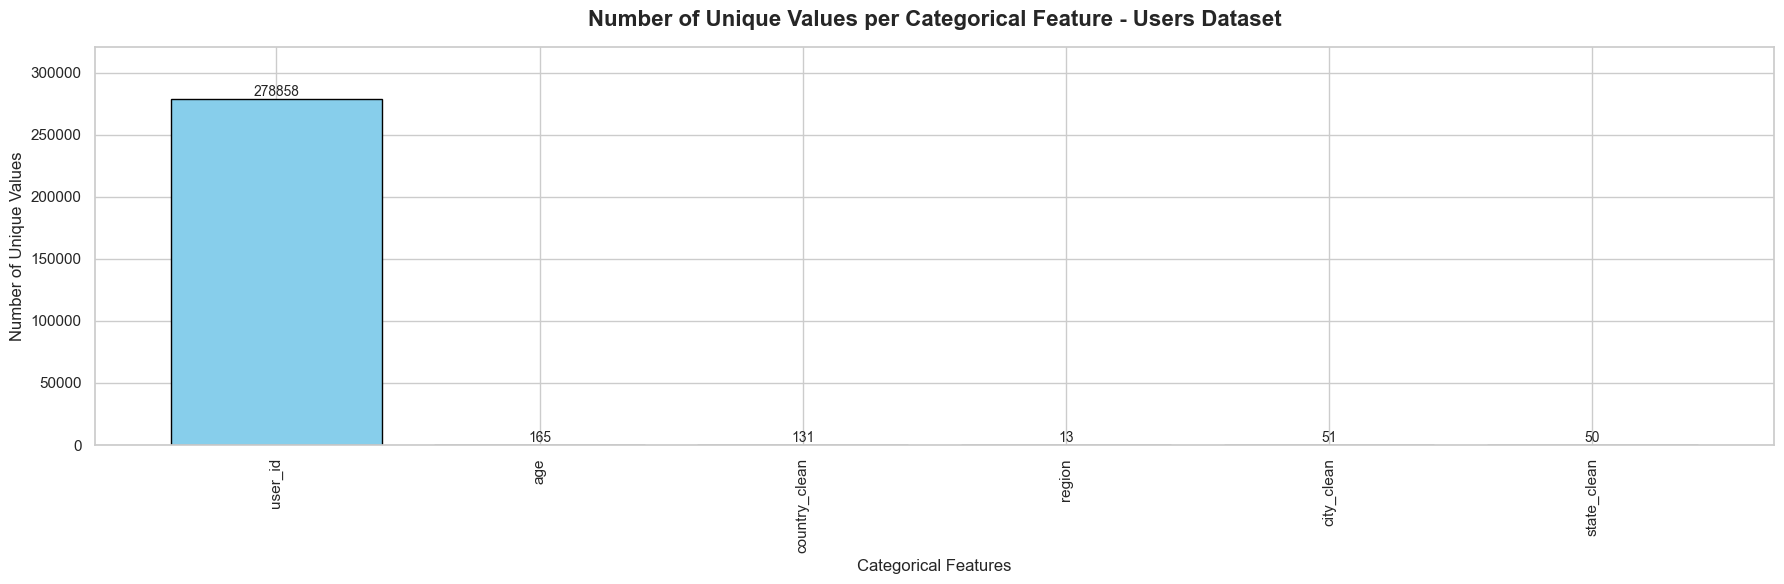

In [59]:
plot_number_of_unique_values(users_df,users_df.columns,"Users Dataset")

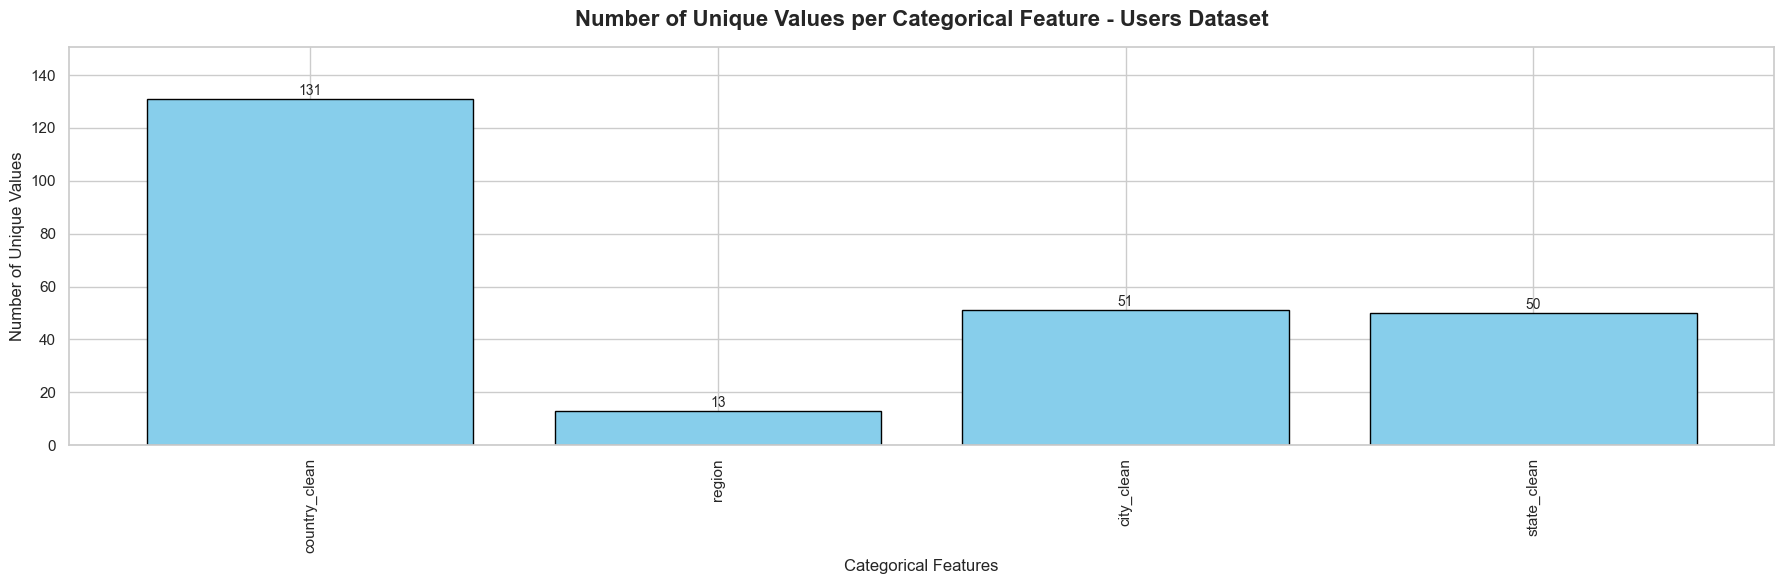

In [60]:
plot_number_of_unique_values(users_df,cat_cols_users,"Users Dataset")

### **3.3.3. Location Information**

In [61]:
users_df["country_clean"].value_counts()

country_clean
usa               139599
canada             21622
united kingdom     18587
germany            17092
spain              13313
                   ...  
kazakhstan            12
fiji                  12
mozambique            11
cayman islands        11
euskal herria         11
Name: count, Length: 131, dtype: int64

Most reader ratings come the USA leading at 139,599 ratings, followed by Canada (21,622), the United Kingdom (18,587), Germany (17,092), and Spain (13,313).

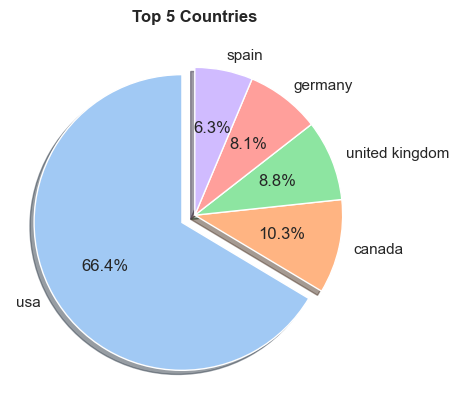

In [62]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['country_clean'].value_counts())) - 1)  # highlight first slice

users_df['country_clean'].value_counts().iloc[:5].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Countries', fontweight='bold')
plt.ylabel('')
plt.show()

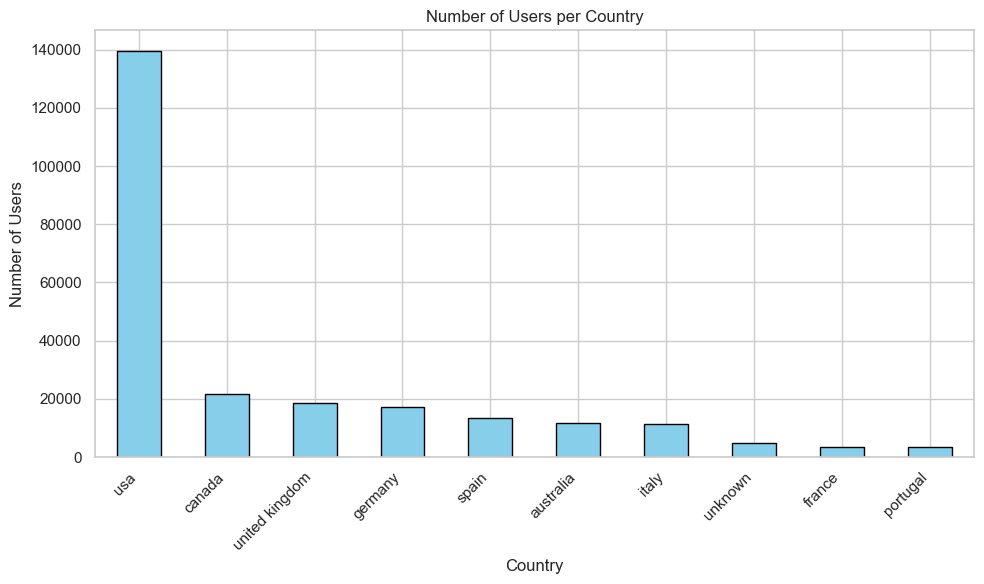

In [63]:
# Count how many times each author appears
country_counts = users_df['country_clean'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Users per Country")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()  # Adjust layout so labels fit
plt.show()

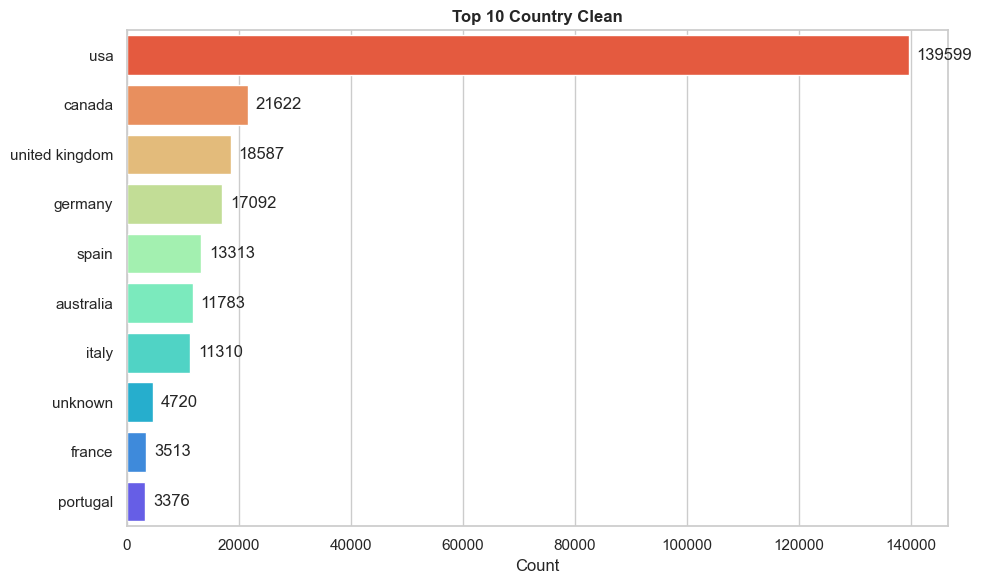

In [64]:
plot_top_categories(users_df, 'country_clean', top_n=10, orientation='h', palette='rainbow_r')

Most users are grouped under the category 'Other' because, during preprocessing, all less-popular cities were combined into this category. Excluding 'Other', we can see that major cities dominate user ratings, with London (4,105), Barcelona (2,664), Toronto (2,342), Madrid (1,933), Sydney (1,884), Chicago (1,566), and New York (1,445) leading the list.

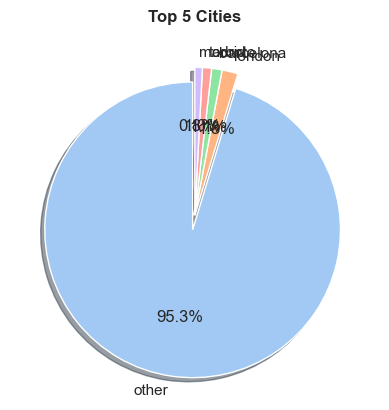

In [65]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['city_clean'].value_counts())) - 1)  # highlight first slice

users_df['city_clean'].value_counts().iloc[:5].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Cities', fontweight='bold')
plt.ylabel('')
plt.show()

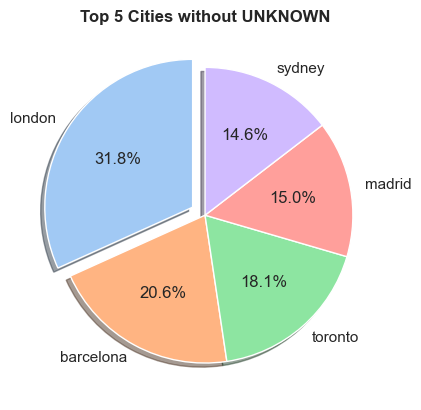

In [66]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['city_clean'].value_counts())) - 1)  # highlight first slice

users_df['city_clean'].value_counts().iloc[1:6].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Cities without UNKNOWN', fontweight='bold')
plt.ylabel('')
plt.show()

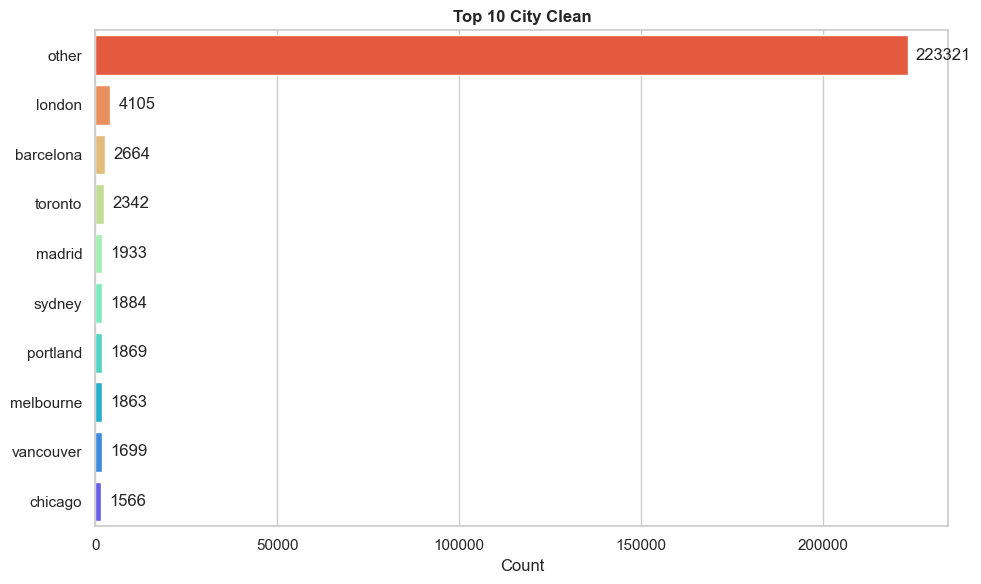

In [67]:
plot_top_categories(users_df, 'city_clean', top_n=10, orientation='h', palette='rainbow_r')

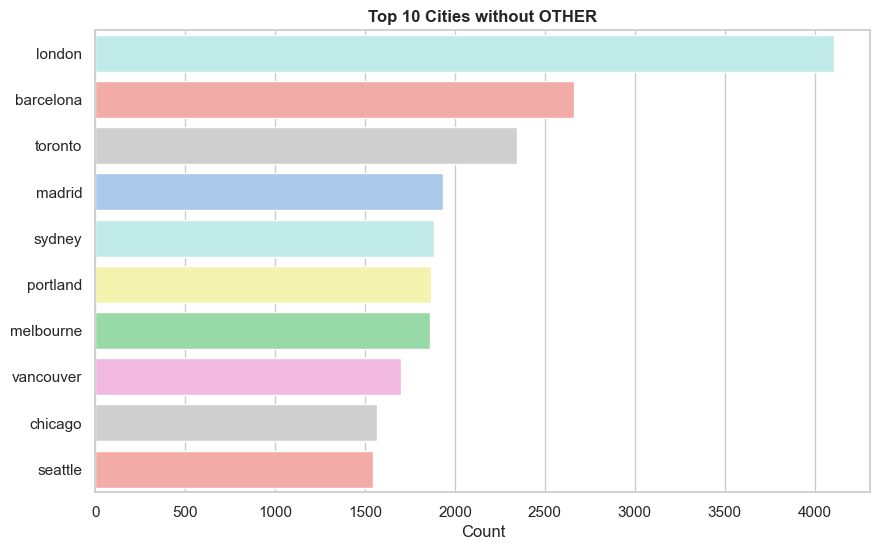

In [68]:
top_cities = users_df['city_clean'].value_counts().iloc[1:11].index

plt.figure(figsize=(10,6))
sns.countplot(
    y='city_clean',
    data=users_df,
    order=top_cities,
    hue='city_clean',  # assign hue to avoid FutureWarning
    dodge=False,
    palette='pastel',
    legend=False       # hide redundant legend
)
plt.title('Top 10 Cities without OTHER', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

# **4. Data Preparation**

# **4.1. Books Dataset**

There are two books with missing authors: "A+ Quiz Masters:01 Earth" (ISBN 0751352497) and "The Credit Suisse
Guide to Managing Your Personal Finances" (ISBN 9627982032). We looked up the correct author information online
and called them as "Dorling Kindersley Publishing Staff" and "Credit Suisse" respectively.

In [69]:
books_df[books_df['book_author'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [70]:
books_df.loc[books_df['isbn'] == '0751352497', 'book_author'] = 'Dorling Kindersley Publishing Staff'
books_df.loc[books_df['isbn'] == '9627982032', 'book_author'] = 'Credit Suisse'

Similarly, two books had missing publishers: "Tyrant Moon" (ISBN 193169656X) and "Finders Keepers" (ISBN
1931696993). We searched for the correct publishers and updated them to "Mundania Press LLC" and "Random
House Publishing Group."
After these corrections, all books now have complete information for both authors and publishers.

In [71]:
books_df[books_df['publisher'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [72]:
books_df.loc[books_df["book_title"]=="Tyrant Moon","publisher"] = "Mundania Press LLC"

In [73]:
books_df.loc[books_df["book_title"]=="Finders Keepers","publisher"] = "Random House Publishing Group"

### Data Quality Issue: `year_of_publication`

The `year_of_publication` column is a mess. It contains a mix of different types of values:

- **Integers** ( `1999`, `2002`)  
- **Strings that look like years** ( `"2000"`, `"1998"`)  
- **Non-year strings**, such as publisher names like `"DK Publishing Inc"`  and `"Gallimard"`  
- **Impossible or invalid years**, such as `0`, `1378`, `1806`, `2030`, and `2050`

Interestingly, when we check for non-digit entries, we only find **about three "bad" rows**, even though there are **65,000+ string values** in total.  
Most of those string entries are actually **numeric strings** (e.g., `"1998"`, `"2003"`, `"0"`), which will need to be converted to integers and cleaned up before analysis.

In [74]:
books_df["year_of_publication"].apply(type).value_counts()

year_of_publication
<class 'str'>    271360
Name: count, dtype: int64

In [75]:
books_df[~books_df["year_of_publication"].apply(lambda x: str(x).isdigit())]

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [76]:
books_df["year_of_publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

To clean up the `year_of_publication` column, we can convert all values to numeric using `pd.to_numeric()` with the `errors='coerce'` parameter.  
This will turn any invalid or non-numeric entries (like publisher names or impossible strings) into `NaN`.


In [77]:
books_df["year_of_publication"] = pd.to_numeric(
    books_df["year_of_publication"], 
    errors='coerce'
)

In [78]:
books_df.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    3
publisher              0
dtype: int64

Replaces invalid years (<1000 or >2025) in `year_of_publication` with NaN.

In [79]:
books_df.loc[
    (books_df["year_of_publication"] < 1000) | 
    (books_df["year_of_publication"] > 2025),
    "year_of_publication"
] = np.nan

Fill missing `year_of_publication` values with the median, then convert the column to integers.


In [80]:
books_df["year_of_publication"] = books_df["year_of_publication"].fillna(
    books_df["year_of_publication"].median()
).astype(int)

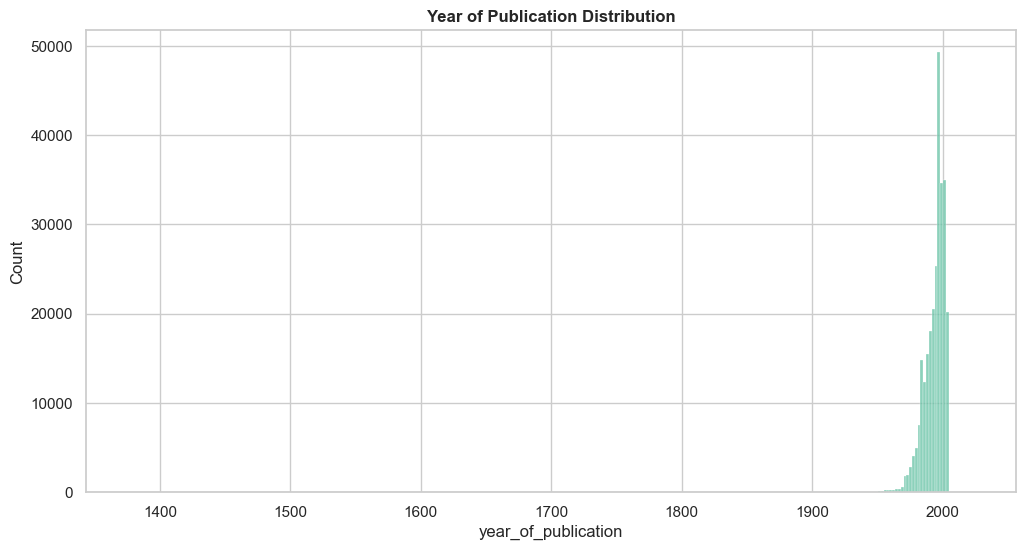

In [81]:
plot_histogram(books_df, 'year_of_publication', bins=300, title='Year of Publication Distribution')

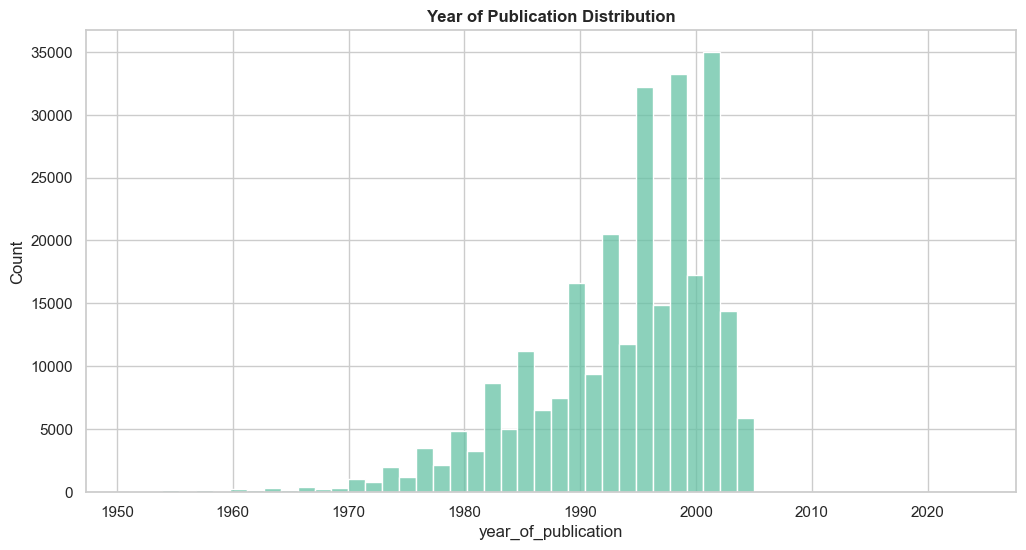

In [82]:
plot_histogram(books_df[books_df["year_of_publication"]>1950], 'year_of_publication', bins=50, title='Year of Publication Distribution')

We can keep only books from 1900

In [83]:
books_df = books_df[books_df['year_of_publication'].between(1900, 2025)]

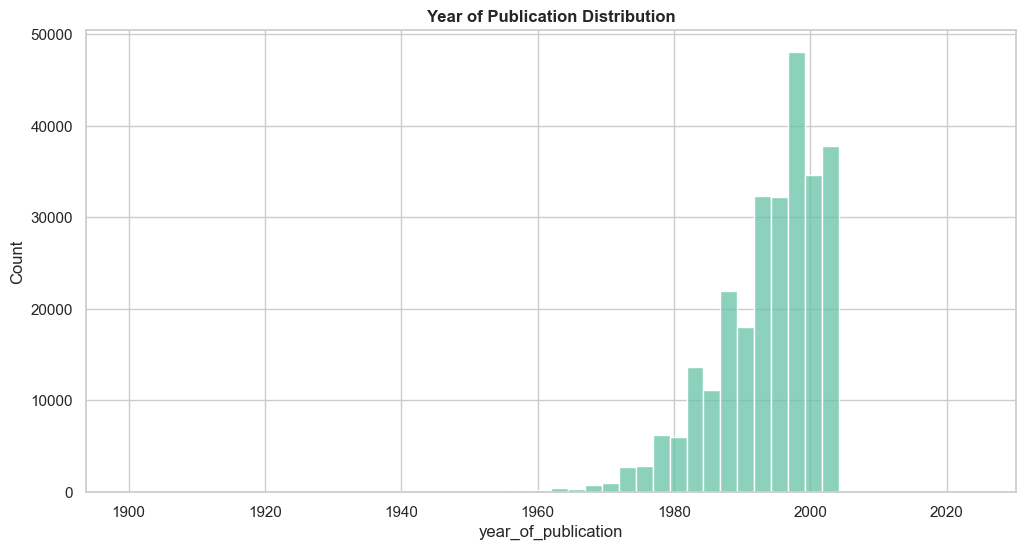

In [84]:
plot_histogram(books_df, 'year_of_publication', bins=50, title='Year of Publication Distribution')

In [85]:
books_df.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

# **4.2. Ratings Dataset**

In [86]:
ratings_df.isna().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [87]:
ratings_df["book_rating"].apply(type).value_counts()

book_rating
<class 'int'>    1149780
Name: count, dtype: int64

In [88]:
ratings_df["isbn"].apply(type).value_counts()

isbn
<class 'str'>    1149780
Name: count, dtype: int64

In [89]:
ratings_df["user_id"].apply(type).value_counts()

user_id
<class 'int'>    1149780
Name: count, dtype: int64

# **4.3. Users Dataset**

In [90]:
users_df["age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

The `age` column is **not normally (Gaussian) distributed** — it is heavily skewed, with many extreme values. Simply relying on the standard Interquartile Range (IQR) method to remove outliers does not work well for this dataset.

- **IQR-based bounds**:  
  - Lower bound: `Q1 - 1.5*IQR = 24 - 30 = -6` → meaningless, leaves many ages as `0` or negative, which are invalid.  
  - Upper bound: `Q3 + 1.5*IQR = 44 + 30 = 74` → too low, would remove valid older users (e.g., 75–99).  

- **Conclusion**: IQR filtering alone is insufficient.  
- **Explicit filtering is needed**: remove ages **below 5** and **above 99** to ensure realistic, meaningful values while keeping the majority of valid data.

Normal Gauissan Distribution for reference

In [91]:
# Generate 1000 random numbers from a normal distribution
mu, sigma = 50, 10  # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

# Convert to a pandas Series for easy description
data_series = pd.Series(data)

In [92]:
# Descriptive statistics
print("Descriptive statistics for the normal distribution:")
print(data_series.describe())

Descriptive statistics for the normal distribution:
count    1000.000000
mean       49.655960
std        10.056206
min        16.505339
25%        42.920519
50%        49.617733
75%        56.280695
max        86.897435
dtype: float64


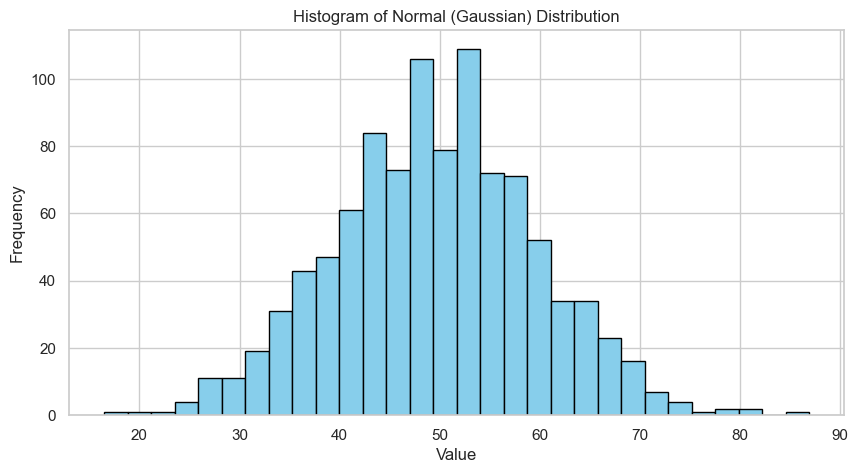

In [93]:
# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Normal (Gaussian) Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

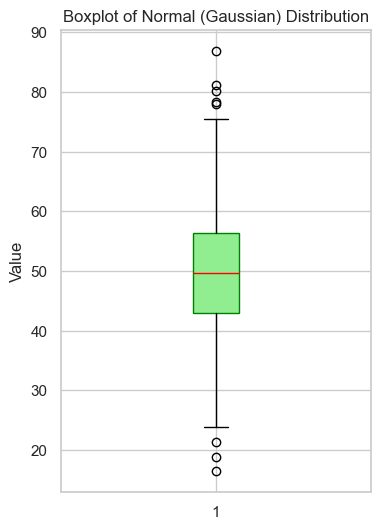

In [94]:
plt.figure(figsize=(4,6))
plt.boxplot(data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'))
plt.title("Boxplot of Normal (Gaussian) Distribution")
plt.ylabel("Value")
plt.show()

In [95]:
books_df["year_of_publication"].apply(type).value_counts()

year_of_publication
<class 'int'>    271356
Name: count, dtype: int64

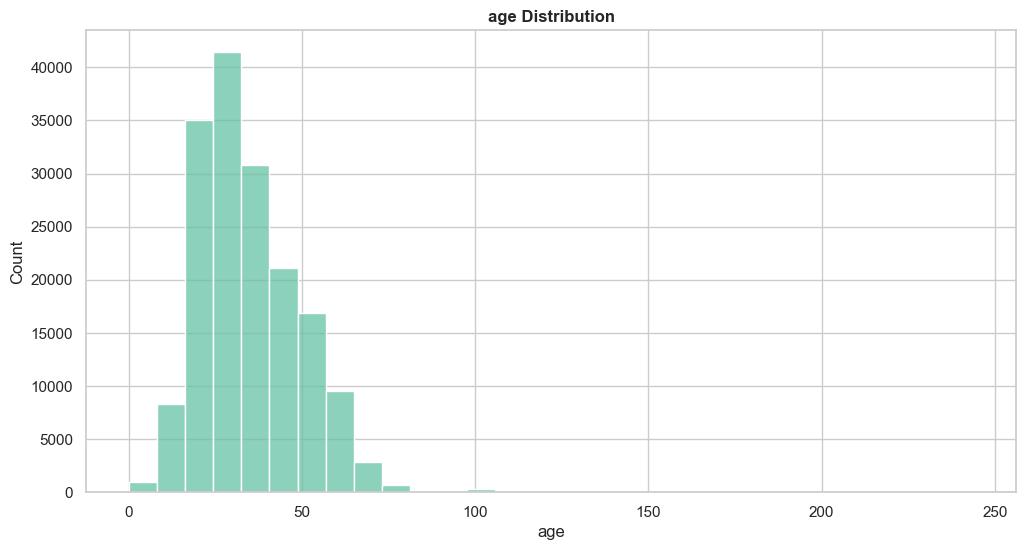

In [96]:
plot_histogram(users_df, 'age', bins=30, title='age Distribution')

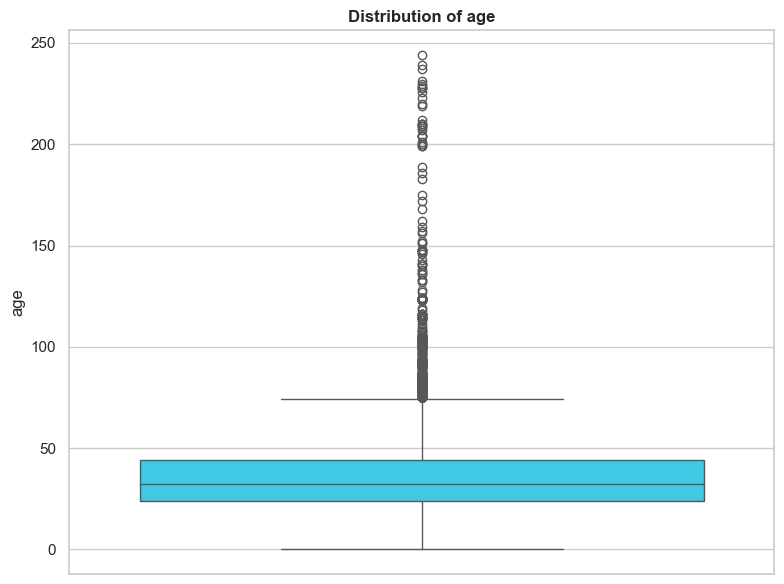

<Axes: title={'center': 'Distribution of age'}, ylabel='age'>

In [97]:
plot_boxplot(users_df, 'age', title='Distribution of age', ylabel='age', palette='cool')

c:\Users\Milos\Desktop\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=by, y=column, data=df, palette=palette)


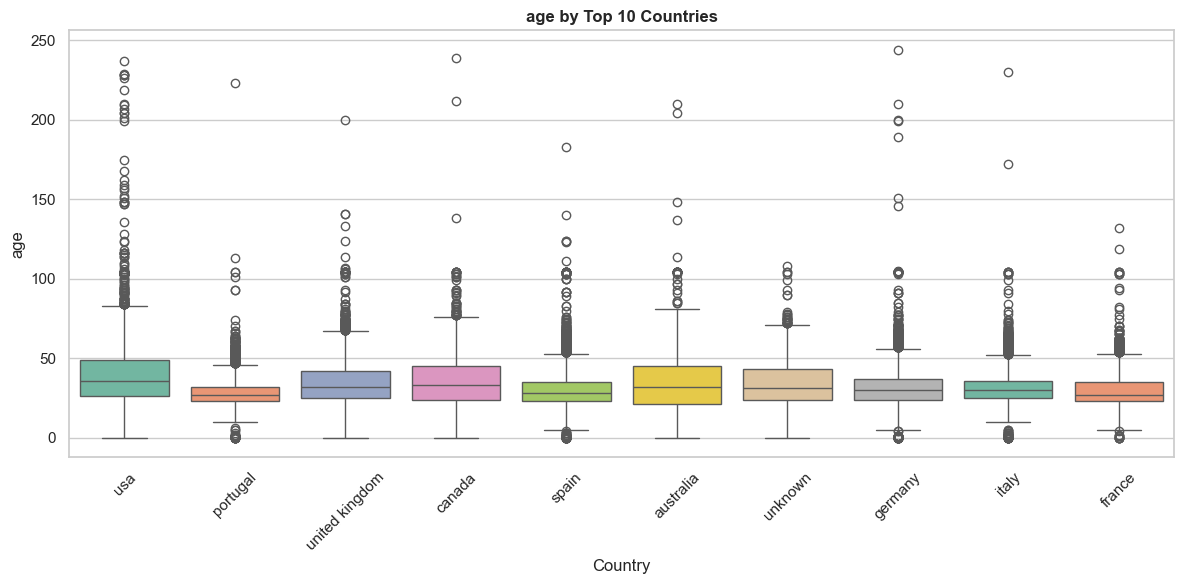

<Axes: title={'center': 'age by Top 10 Countries'}, xlabel='Country', ylabel='age'>

In [98]:
# Get top 10 countries by count
top_countries = users_df['country_clean'].value_counts().nlargest(10).index

# Filter the DataFrame
df_top10 = users_df[users_df['country_clean'].isin(top_countries)]

# Plot only the top 10 countries
plot_boxplot(
    df_top10, 
    column='age', 
    by='country_clean', 
    title='age by Top 10 Countries', 
    ylabel='age', 
    xlabel='Country', 
    palette='Set2', 
    rotate_xticks=True, 
    figsize=(12,6)
)

In [99]:
# Explicitly remove impossible ages
users_df.loc[(users_df['age'] <= 5) | (users_df['age'] > 99), 'age'] = np.nan

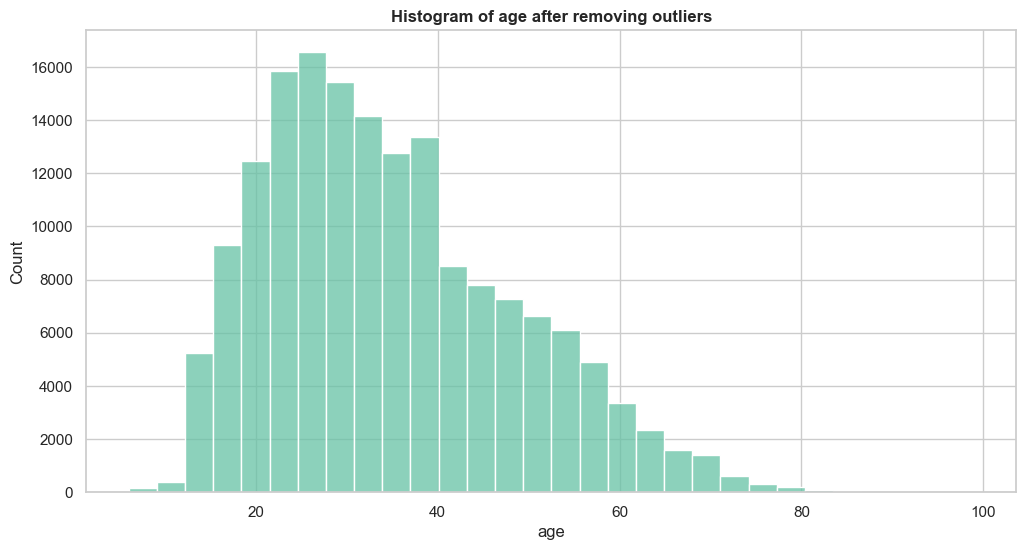

In [100]:
plot_histogram(users_df,"age",bins = 30, title= "Histogram of age after removing outliers")

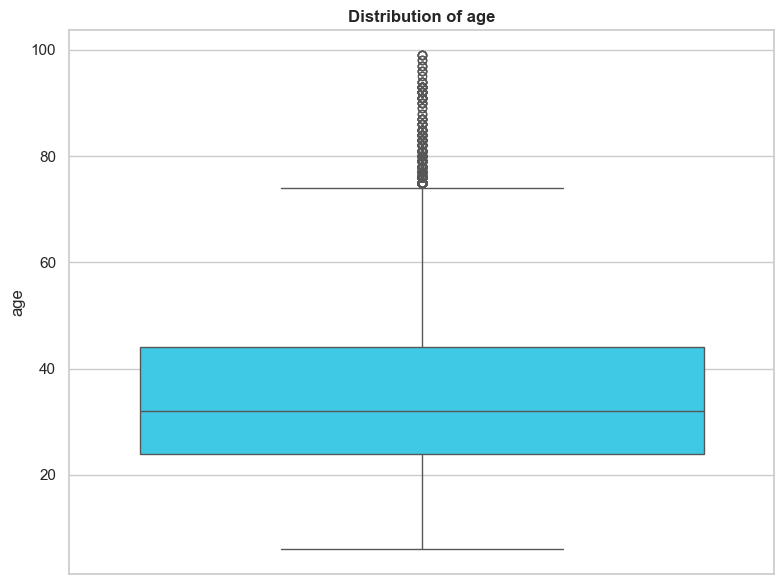

<Axes: title={'center': 'Distribution of age'}, ylabel='age'>

In [101]:
plot_boxplot(users_df, 'age', title='Distribution of age', ylabel='age', palette='cool')

We still have a **large number of missing values**. This shows that **112,043 rows** have missing `age`. Dropping these rows would result in a huge data loss, so we need to **impute** them.

In [102]:
users_df.isna().sum()

user_id               0
age              112043
country_clean         0
region                0
city_clean            0
state_clean           0
dtype: int64

We use a **random imputation method** based on the statistical distribution of the existing ages, median(central tendency of the ages), std (spread of the ages), nulls (total number of missing age values):  

In [103]:
median = users_df['age'].median()
std = users_df['age'].std()
nulls = users_df['age'].isna().sum()

This simulates a realistic age distribution using the existing data, centers the distribution around the median age and ensures the generated ages have a similar spread as the original data and ensures ages are not below 5 or above 100, keeping them realistic:

In [104]:
random_age = np.random.normal(loc=median, scale=std, size=nulls)
random_age = np.clip(random_age, 5, 100)  # limit to plausible range

Assigns the generated random ages to the missing entries and rounds to integer values since age is discrete:

In [105]:
users_df.loc[users_df['age'].isna(), 'age'] = random_age.round().astype(int)

Missing values are replaced with realistic ages, the overall age distribution remains similar to the original data, no extreme outliers are introduced, and all ages fall within the plausible range of 5–100.

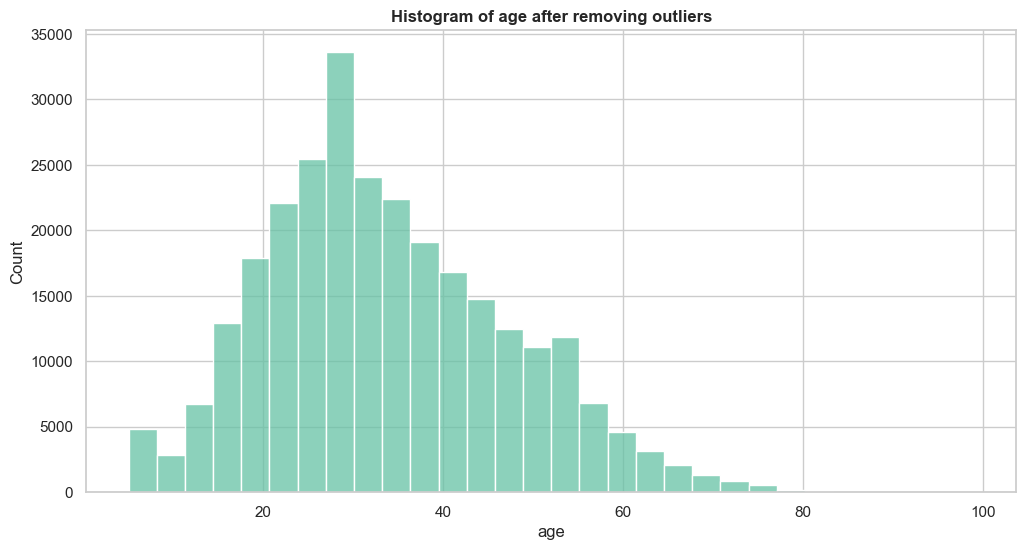

In [106]:
plot_histogram(users_df,"age",bins = 30, title= "Histogram of age after removing outliers")

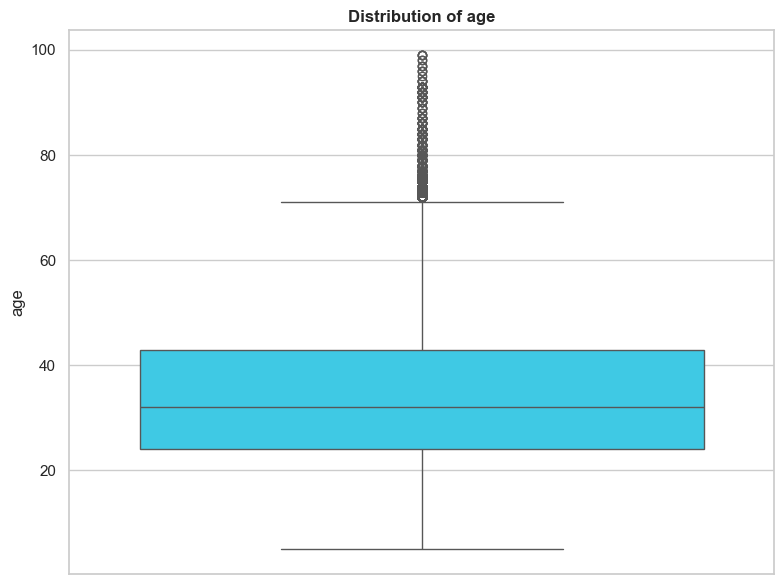

<Axes: title={'center': 'Distribution of age'}, ylabel='age'>

In [107]:
plot_boxplot(users_df, 'age', title='Distribution of age', ylabel='age', palette='cool')

# **5. Merge Datasets / Feature Engineering**

Merges `users_df` (278,858 rows, 6 columns) with `ratings_df` (1,149,780 rows, 3 columns) on `user_id`.  
Each row in the result represents a rating with the corresponding user’s info.  

By default, `pd.merge()` does an **inner join**:

- Keeps only `user_id`s present in both dataframes.  
- Users without ratings or ratings without matching users are dropped.

In [108]:
users_ratings=pd.merge(users_df,ratings_df,on='user_id')

When combining datasets, we merge/join on **`isbn`** rather than `book_title`.because **`isbn` is unique**: Each book edition has a distinct ISBN across all tables, and we determined in EDA **`book_title` IS NOT unique**: Multiple editions of the same book share a title but have different isbn. Typos, extra spaces, or differences in casing can cause mismatches. **Merging on `book_title` can lead to:**  Duplicate rows, Incorrect joins, Missing records. 

In [109]:
merged_df=pd.merge(users_ratings,books_df,on='isbn')

In [110]:
original_merged_df = merged_df

In [111]:
merged_df.isna().sum()

user_id                0
age                    0
country_clean          0
region                 0
city_clean             0
state_clean            0
isbn                   0
book_rating            0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\59632490.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


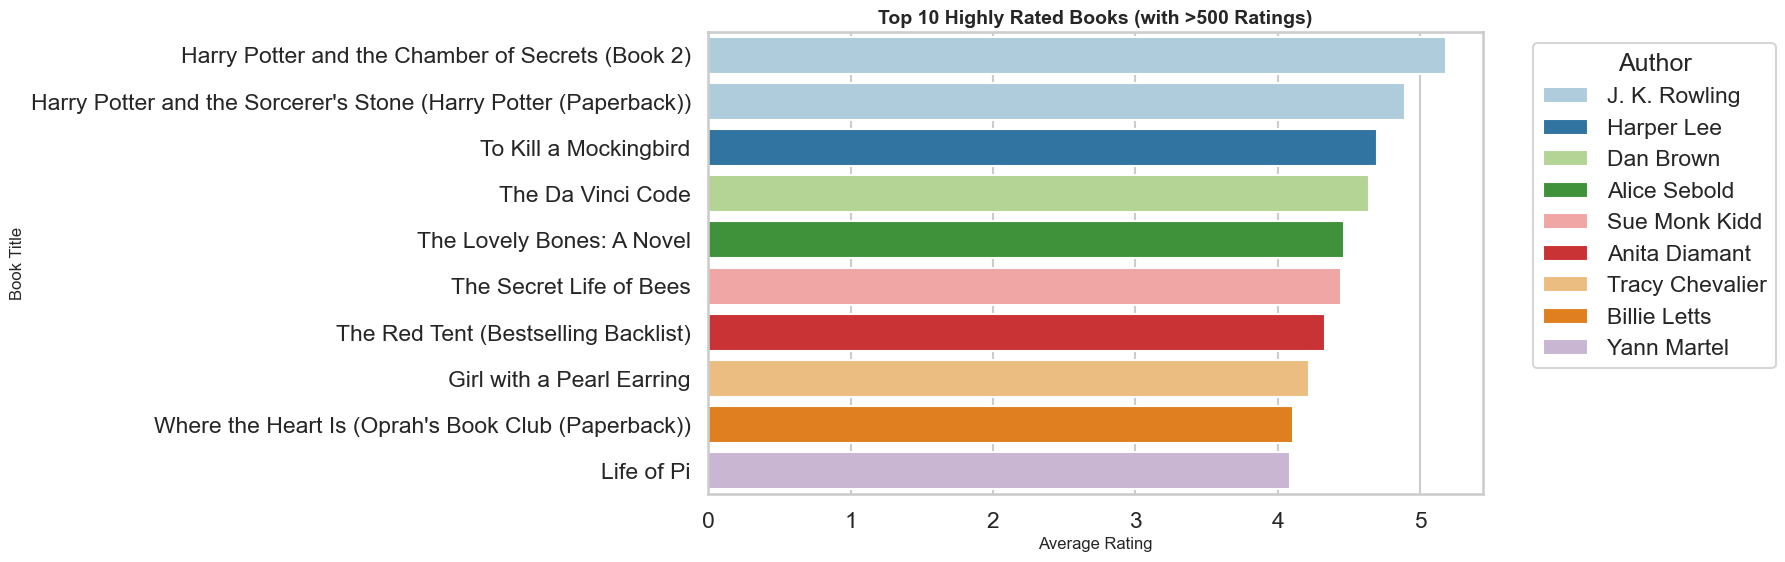

In [112]:
# Aggregate mean and count of ratings per book
book_rating = (
    merged_df.groupby(['book_title', 'book_author'])['book_rating']
    .agg(count='count', mean='mean')
    .reset_index()
)

# Filter to only books with a substantial number of ratings
filtered_books_500 = book_rating.query("count > 500").sort_values('mean', ascending=False).head(10)

# Improve the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_books_500,
    x='mean',
    y='book_title',
    hue='book_author',
    palette='Paired',
)

# Labels and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Top 10 Highly Rated Books (with >500 Ratings)', fontsize=14, fontweight='bold')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [113]:
filtered_books_500.value_counts()

book_title                                                        book_author      count  mean    
Girl with a Pearl Earring                                         Tracy Chevalier  526    4.218631    1
Harry Potter and the Chamber of Secrets (Book 2)                  J. K. Rowling    556    5.183453    1
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))  J. K. Rowling    575    4.895652    1
Life of Pi                                                        Yann Martel      664    4.088855    1
The Da Vinci Code                                                 Dan Brown        887    4.642616    1
The Lovely Bones: A Novel                                         Alice Sebold     1295   4.468726    1
The Red Tent (Bestselling Backlist)                               Anita Diamant    723    4.334716    1
The Secret Life of Bees                                           Sue Monk Kidd    774    4.447028    1
To Kill a Mockingbird                                             Har

We can remove ratings with a value of `0`, which represent books that users haven’t actually rated.  
However, doing this reduces the number of ratings per book, so some books that originally had more than 500 ratings may now fall below that threshold after these rows are removed.

In [114]:
merged_df = merged_df[merged_df['book_rating']!=0]

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\3075332694.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


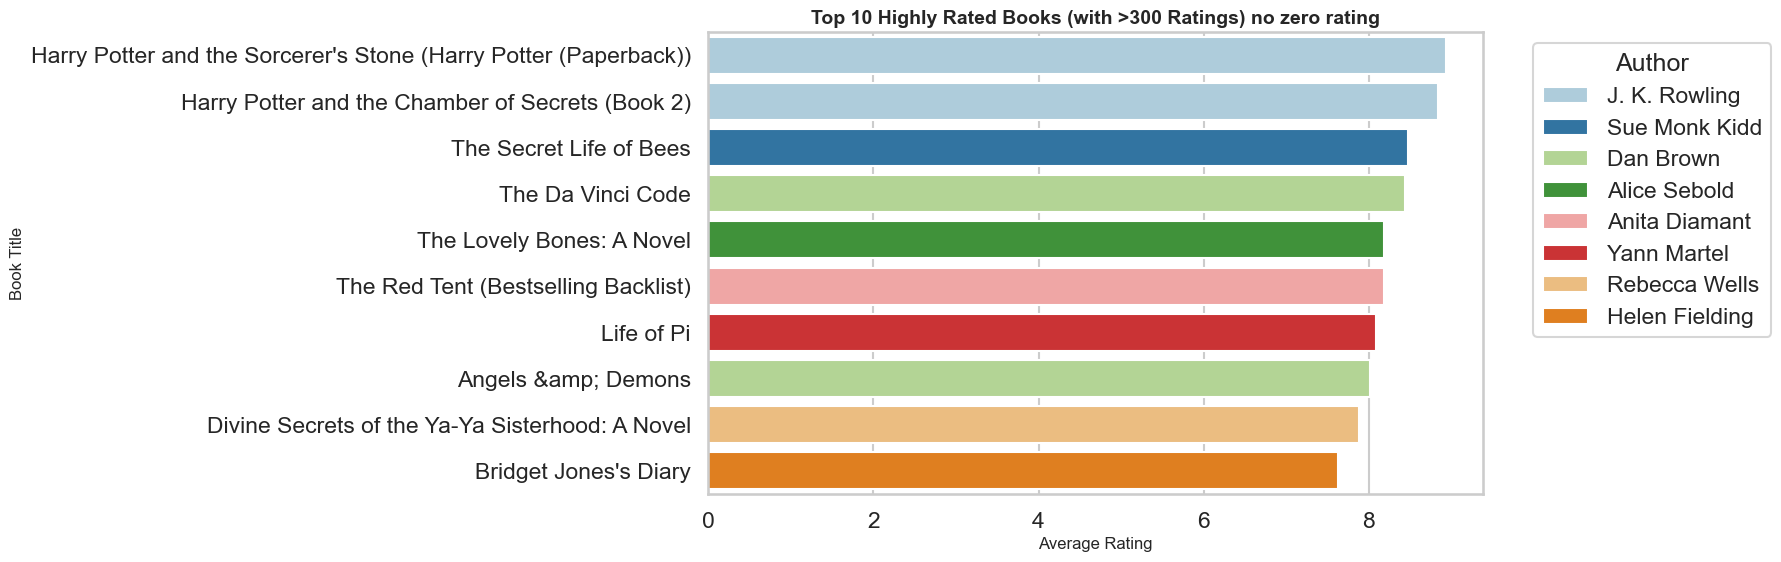

In [115]:
# Aggregate mean and count of ratings per book
book_rating = (
    merged_df.groupby(['book_title', 'book_author'])['book_rating']
    .agg(count='count', mean='mean')
    .reset_index()
)

# Filter to only books with a substantial number of ratings
filtered_books_no_zero_300 = book_rating.query("count > 300").sort_values('mean', ascending=False).head(10)

# Improve the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_books_no_zero_300,
    x='mean',
    y='book_title',
    hue='book_author',
    palette='Paired',
)

# Labels and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Top 10 Highly Rated Books (with >300 Ratings) no zero rating', fontsize=14, fontweight='bold')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


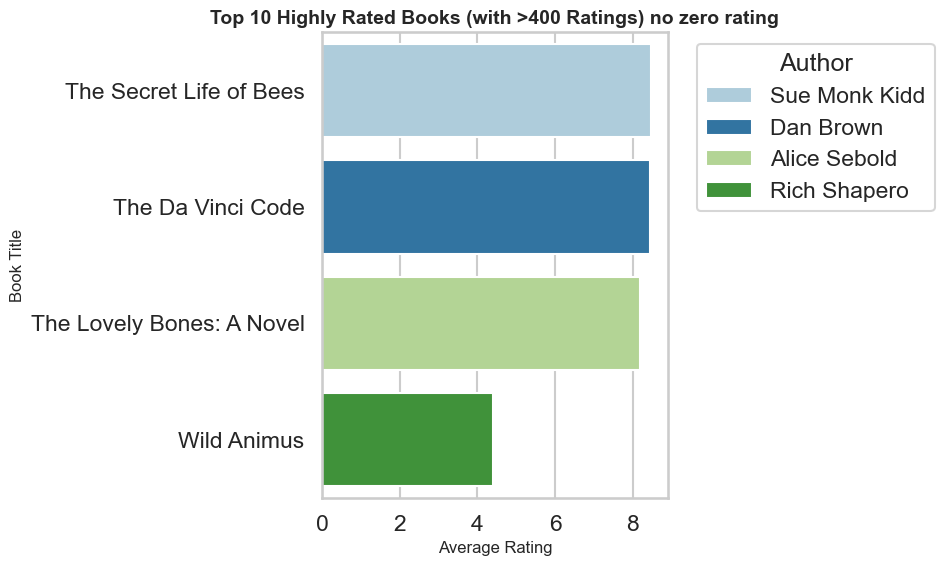

In [116]:
# Aggregate mean and count of ratings per book
book_rating = (
    merged_df.groupby(['book_title', 'book_author'])['book_rating']
    .agg(count='count', mean='mean')
    .reset_index()
)

# Filter to only books with a substantial number of ratings
filtered_books_no_zero_400 = book_rating.query("count > 400").sort_values('mean', ascending=False).head(10)

# Improve the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_books_no_zero_400,
    x='mean',
    y='book_title',
    hue='book_author',
    palette='Paired',
)

# Labels and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Top 10 Highly Rated Books (with >400 Ratings) no zero rating', fontsize=14, fontweight='bold')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


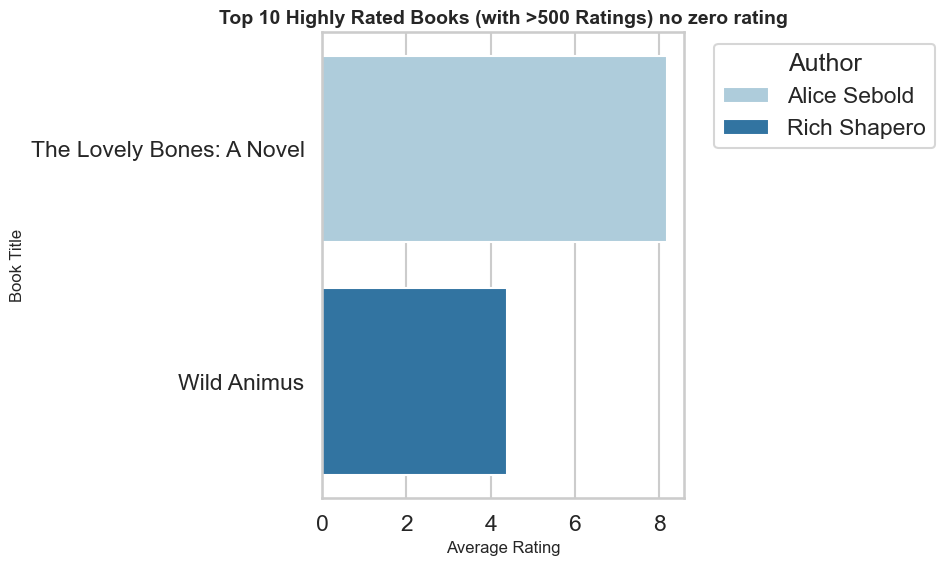

In [117]:
# Aggregate mean and count of ratings per book
book_rating = (
    merged_df.groupby(['book_title', 'book_author'])['book_rating']
    .agg(count='count', mean='mean')
    .reset_index()
)

# Filter to only books with a substantial number of ratings
filtered_books_no_zero_500 = book_rating.query("count > 500").sort_values('mean', ascending=False).head(10)

# Improve the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_books_no_zero_500,
    x='mean',
    y='book_title',
    hue='book_author',
    palette='Paired',
)

# Labels and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Top 10 Highly Rated Books (with >500 Ratings) no zero rating', fontsize=14, fontweight='bold')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [118]:
filtered_books_no_zero_300.value_counts()

book_title                                                        book_author     count  mean    
Angels &amp; Demons                                               Dan Brown       310    8.016129    1
Bridget Jones's Diary                                             Helen Fielding  377    7.625995    1
Divine Secrets of the Ya-Ya Sisterhood: A Novel                   Rebecca Wells   323    7.876161    1
Harry Potter and the Chamber of Secrets (Book 2)                  J. K. Rowling   326    8.840491    1
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))  J. K. Rowling   315    8.936508    1
Life of Pi                                                        Yann Martel     336    8.080357    1
The Da Vinci Code                                                 Dan Brown       488    8.438525    1
The Lovely Bones: A Novel                                         Alice Sebold    707    8.185290    1
The Red Tent (Bestselling Backlist)                               Anita Diaman

In [119]:
filtered_books_no_zero_400.value_counts()

book_title                 book_author    count  mean    
The Da Vinci Code          Dan Brown      488    8.438525    1
The Lovely Bones: A Novel  Alice Sebold   707    8.185290    1
The Secret Life of Bees    Sue Monk Kidd  406    8.477833    1
Wild Animus                Rich Shapero   581    4.390706    1
Name: count, dtype: int64

In [120]:
filtered_books_no_zero_500.value_counts()

book_title                 book_author   count  mean    
The Lovely Bones: A Novel  Alice Sebold  707    8.185290    1
Wild Animus                Rich Shapero  581    4.390706    1
Name: count, dtype: int64

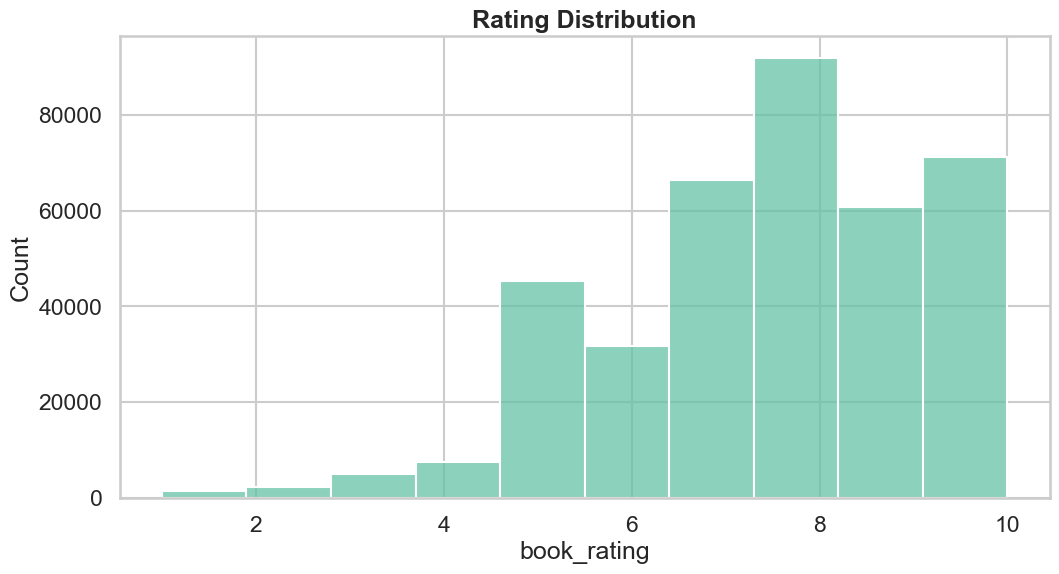

In [121]:
plot_histogram(merged_df, 'book_rating', bins=10, title='Rating Distribution')

# **5.1. Feature Engineering and More Insights**

This section creates **user-level features**:

- **`user_avg_rating`** – the average rating each user gives  
- **`user_num_ratings`** – the total number of ratings per user  
- **`User_rating_variability`** – how consistent a user’s ratings are (standard deviation)  

These features are stored in a separate dataframe for easier analysis.

In [122]:
# Average rating given by each user
merged_df.loc[:, 'user_avg_rating'] = merged_df.groupby('user_id')['book_rating'].transform('mean')

# Total number of ratings by each user
merged_df.loc[:, 'user_num_ratings'] = merged_df.groupby('user_id')['book_rating'].transform('count')

# Create a separate dataframe for easy inspection
user_level_features = merged_df[['user_id', 'user_avg_rating', 'user_num_ratings']].drop_duplicates()

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\3973514105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'user_avg_rating'] = merged_df.groupby('user_id')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\3973514105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'user_num_ratings'] = merged_df.groupby('user_id')['book_rating'].transform('count')


From our new features, we see that most users rated only one book (39,223 users), with a steep drop for 2 or 3 ratings. This highlights a severe cold-start problem, making it hard for user-based filtering to find similar users. A few users, however, rated many books, with some giving over 300 ratings, showing that highly active users could still provide useful patterns for recommendations.

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\844887893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq.index.astype(int), y=freq.values, palette='pastel')


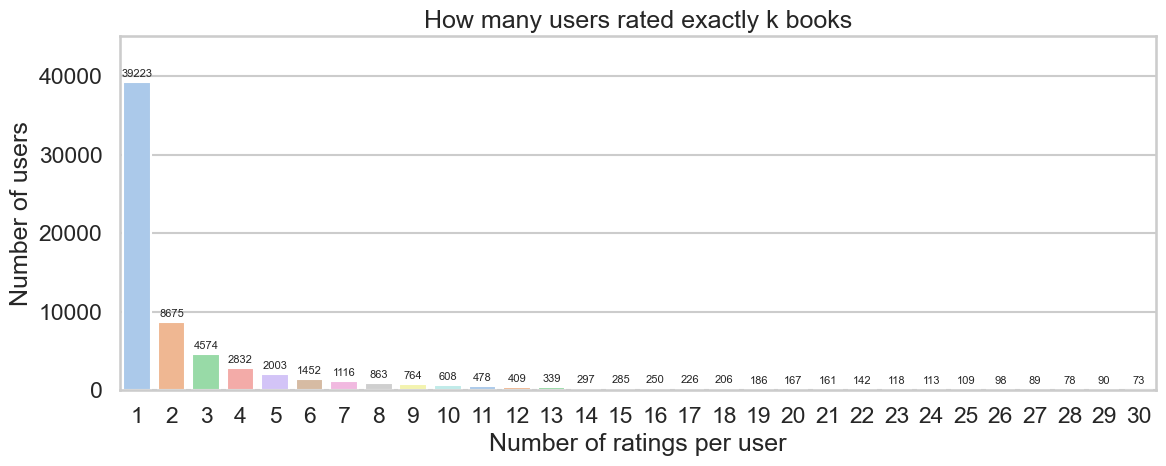

In [123]:
# Count how many ratings each user gave
user_counts_merged = merged_df.groupby('user_id')['book_rating'].count()

# Count how many users gave exactly k ratings
freq = user_counts_merged.value_counts().sort_index()

# Limit to a sensible range (e.g., up to 30 ratings)
max_k = 30
freq = freq.loc[freq.index <= max_k]

plt.figure(figsize=(12,5))
ax = sns.barplot(x=freq.index.astype(int), y=freq.values, palette='pastel')
plt.xlabel('Number of ratings per user')
plt.ylabel('Number of users')
plt.title('How many users rated exactly k books')

# Dynamically adjust y-axis to leave space for numbers
plt.ylim(0, freq.values.max() * 1.15)

# Annotate bars above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # center of the bar
        height + freq.values.max() * 0.01,  # small offset above the bar
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

In [124]:
user_counts = merged_df.groupby('user_id')['book_rating'].count()

In [125]:
user_counts.value_counts()

book_rating
1      39223
2       8675
3       4574
4       2832
5       2003
       ...  
380        1
223        1
260        1
179        1
142        1
Name: count, Length: 289, dtype: int64

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2127953823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq_avg.index, y=freq_avg.values, palette='pastel')


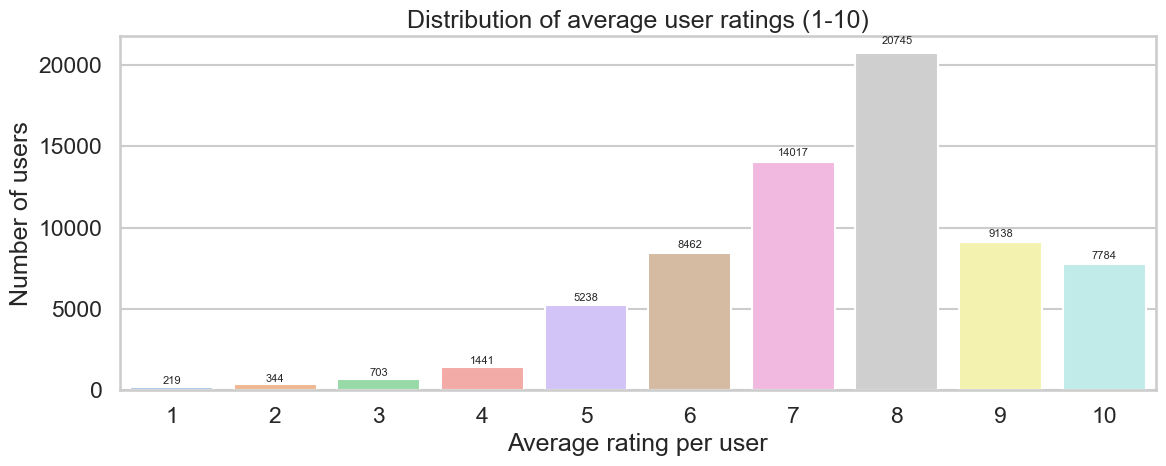

In [126]:
# Round user average ratings to nearest integer for counting
avg_rating_rounded = merged_df.groupby('user_id')['user_avg_rating'].mean().round().astype(int)

# Count how many users have each average rating
freq_avg = avg_rating_rounded.value_counts().sort_index()

# Limit to ratings 1–10
freq_avg = freq_avg.loc[(freq_avg.index >= 1) & (freq_avg.index <= 10)]

plt.figure(figsize=(12,5))
ax = sns.barplot(x=freq_avg.index, y=freq_avg.values, palette='pastel')
plt.xlabel('Average rating per user')
plt.ylabel('Number of users')
plt.title('Distribution of average user ratings (1-10)')

# Annotate bars properly
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # center of the bar
        height + height * 0.02,         # 2% of bar height as offset
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

Creates a **user age group feature** by binning ages into 5 ranges (0–18, 18–25, 25–35, 35–50, 50–100) and assigning numeric group codes from 1 to 5.

In [127]:
merged_df.isna().sum()

user_id                0
age                    0
country_clean          0
region                 0
city_clean             0
state_clean            0
isbn                   0
book_rating            0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_avg_rating        0
user_num_ratings       0
dtype: int64

In [128]:
# Define bins (adjustable) and labels 1–5
age_bins = [0, 18, 25, 35, 50, 105]  # covers ages up to 120
age_labels = [1, 2, 3, 4, 5]         # numeric group codes

# Create a new column
merged_df['User_age_Group'] = pd.cut(
    merged_df['age'],
    bins=age_bins,
    labels=age_labels,
    right=False  # includes the left edge (e.g., 18 goes to group 2)
).astype(int)

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\1541873042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['User_age_Group'] = pd.cut(


Creates **book-level features**:

- **`book_avg_rating`** – average rating for each book  
- **`book_num_ratings`** – total number of ratings per book  
- **`book_rating_variability`** – variation in book ratings (std)  
- **`book_popularity_score`** – popularity metric combining average rating and number of ratings  

A summary dataframe is then created with these unique book-level features.

In [129]:
# Average rating per book (some books have multiple isbns)
merged_df.loc[:, 'book_avg_rating'] = merged_df.groupby('book_title')['book_rating'].transform('mean')

# Number of ratings per book
merged_df.loc[:, 'book_num_ratings'] = merged_df.groupby('book_title')['book_rating'].transform('count')

# Optional: Book popularity score (weighted by number of ratings)
merged_df.loc[:, 'book_popularity_score'] = merged_df['book_avg_rating'] * np.log1p(merged_df['book_num_ratings'])

# Create a distinct book-level summary DataFrame
book_level_features = merged_df[['book_title', 'book_avg_rating', 'book_num_ratings', 'book_popularity_score']].drop_duplicates()

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2631277146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'book_avg_rating'] = merged_df.groupby('book_title')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2631277146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'book_num_ratings'] = merged_df.groupby('book_title')['book_rating'].transform('count')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2631277146.py:8: SettingWithCop

Looking at how many ratings each book received, most books were rated only once (88,137 books), with the number of books dropping sharply for 2 or 3 ratings. This shows that the dataset is sparse, making it harder for item-based collaborative filtering to find similar books. A few books, however, received hundreds of ratings, with some exceeding 500, indicating that popular books can still provide strong signals for recommendations.

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2584847221.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq_books.index.astype(int), y=freq_books.values, palette='pastel')


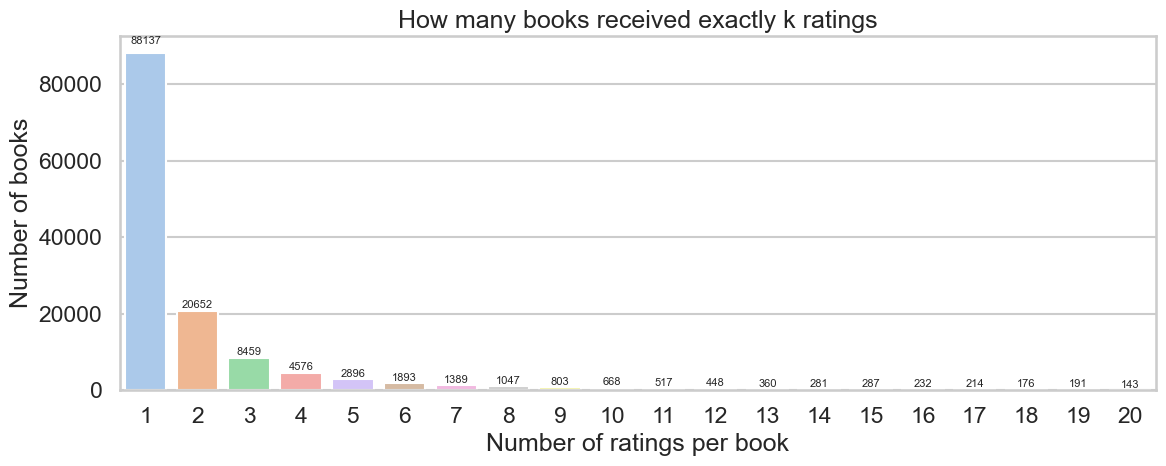

In [130]:
# Count how many ratings each book received
book_counts = merged_df.groupby('book_title')['book_rating'].count()
freq_books = book_counts.value_counts().sort_index()  # index = number of ratings, value = number of books

# Optionally limit to a sensible range
max_k = 20
freq_books = freq_books.loc[freq_books.index <= max_k]

plt.figure(figsize=(12,5))
ax = sns.barplot(x=freq_books.index.astype(int), y=freq_books.values, palette='pastel')
plt.xlabel('Number of ratings per book')
plt.ylabel('Number of books')
plt.title('How many books received exactly k ratings')

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # center of the bar
        height + height * 0.02,         # 2% of bar height offset
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

In [131]:
book_counts.value_counts()

book_rating
1      88137
2      20652
3       8459
4       4576
5       2896
       ...  
267        1
250        1
295        1
177        1
581        1
Name: count, Length: 212, dtype: int64

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2934923463.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq_books_avg.index, y=freq_books_avg.values, palette=colors)


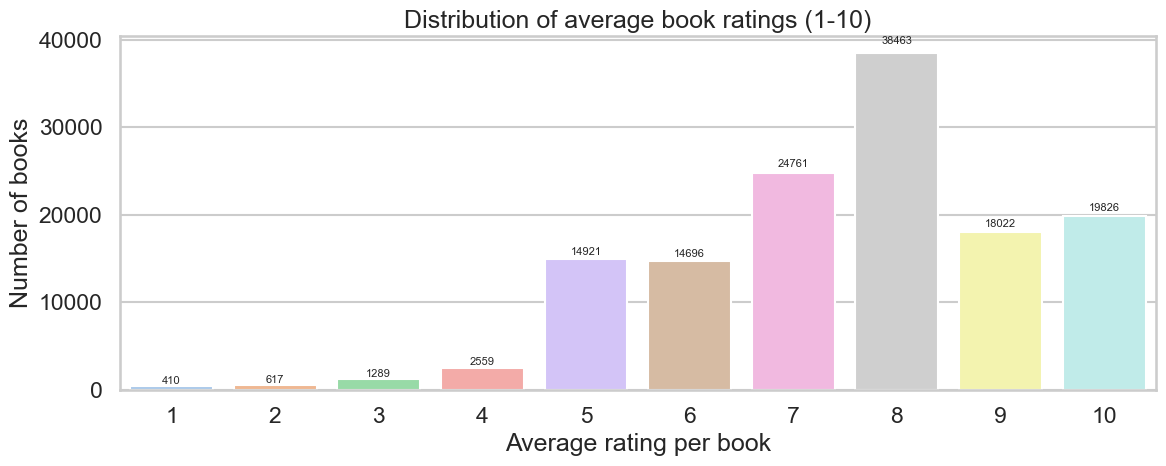

In [132]:
# Round book average ratings to nearest integer
avg_rating_books = merged_df.groupby('book_title')['book_avg_rating'].mean().round().astype(int)

# Count how many books have each average rating
freq_books_avg = avg_rating_books.value_counts().sort_index()

# Limit to ratings 1–10
freq_books_avg = freq_books_avg.loc[(freq_books_avg.index >= 1) & (freq_books_avg.index <= 10)]

plt.figure(figsize=(12,5))
colors = sns.color_palette('pastel', n_colors=len(freq_books_avg))
ax = sns.barplot(x=freq_books_avg.index, y=freq_books_avg.values, palette=colors)
plt.xlabel('Average rating per book')
plt.ylabel('Number of books')
plt.title('Distribution of average book ratings (1-10)')

# Annotate bars properly
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # center of the bar
        height + height * 0.02,         # 2% of bar height offset
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

This section creates additional features at different levels:

- **Author-level:** `author_avg_rating` – the average rating of all books by each author.  
- **Publisher-level:** `publisher_avg_rating` – the average rating of all books by each publisher.  
- **Book age:** `book_age` – the age of each book calculated as the difference between the current year (2025) and its year of publication.

In [133]:
# --- AUTHOR-LEVEL FEATURE ---
merged_df.loc[:, 'author_avg_rating'] = merged_df.groupby('book_author')['book_rating'].transform('mean')

# --- publisher-LEVEL FEATURE ---
merged_df.loc[:, 'publisher_avg_rating'] = merged_df.groupby('publisher')['book_rating'].transform('mean')

# --- BOOK age FEATURE ---
current_year = 2025
merged_df.loc[:, 'book_age'] = current_year - merged_df['year_of_publication']

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\1110407032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'author_avg_rating'] = merged_df.groupby('book_author')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\1110407032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'publisher_avg_rating'] = merged_df.groupby('publisher')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\1110407032.py:9: SettingWi

This section creates **location-based features**:

- **`country_avg_rating`** – average rating per country.  
- **`region_avg_rating`** – average rating per region.  
- **`city_avg_rating`** – average rating per city.  
- **`user_country_rating_bias`** – difference between a user’s average rating and their country’s average, capturing personal bias.  
- **`book_country_avg_rating`** – average rating of each book within each country, reflecting local popularity.

In [134]:
# --- location-BASED FEATURES ---

# Country-level average rating
merged_df.loc[:, 'country_avg_rating'] = merged_df.groupby('country_clean')['book_rating'].transform('mean')

# region-level average rating (if region exists)
merged_df.loc[:, 'region_avg_rating'] = merged_df.groupby('region')['book_rating'].transform('mean')

# City-level average rating (optional, more granular)
merged_df.loc[:, 'city_avg_rating'] = merged_df.groupby('city_clean')['book_rating'].transform('mean')

# User’s bias compared to their country's average
merged_df.loc[:, 'user_country_rating_bias'] = merged_df['user_avg_rating'] - merged_df['country_avg_rating']

# Average rating for each Book within each Country
merged_df.loc[:, 'book_country_avg_rating'] = merged_df.groupby(['book_title', 'country_clean'])['book_rating'].transform('mean')

C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2535821576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'country_avg_rating'] = merged_df.groupby('country_clean')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2535821576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'region_avg_rating'] = merged_df.groupby('region')['book_rating'].transform('mean')
C:\Users\Milos\AppData\Local\Temp\ipykernel_3200\2535821576.py:10: SettingWith

In [135]:
merged_df.shape

(383839, 26)

# **5.2. Plots and More Insights**

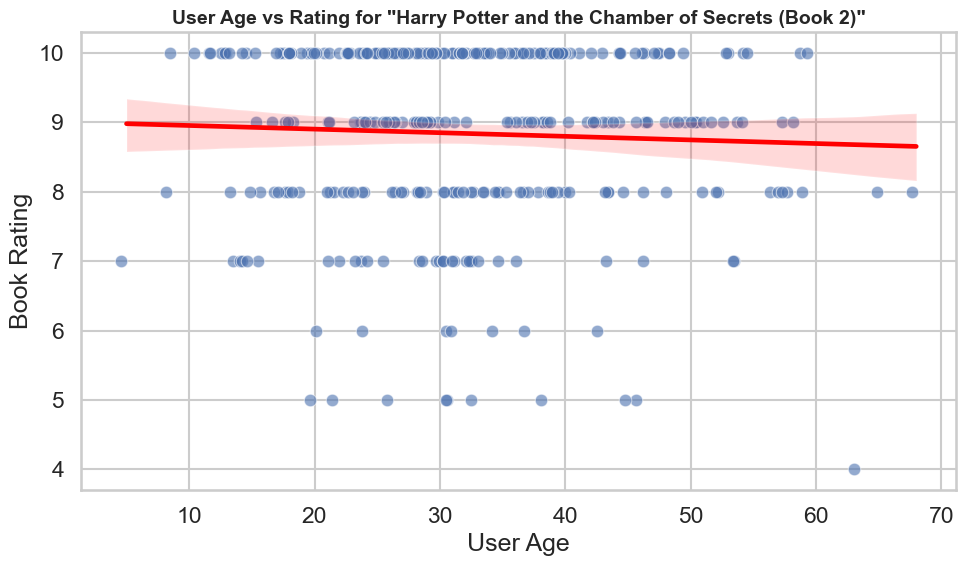

In [136]:
# Example for a single top-rated book
book_name = filtered_books_500.iloc[0]['book_title']  # top book
book_data = merged_df[merged_df['book_title'] == book_name].copy()

# Add small jitter to age to avoid overlapping points
jitter_strength = 0.5
book_data['age_jitter'] = book_data['age'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(book_data))

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Scatter with jitter
sns.scatterplot(
    data=book_data,
    x='age_jitter',
    y='book_rating',
    alpha=0.6
)

# Regression line
sns.regplot(
    data=book_data,
    x='age',
    y='book_rating',
    scatter=False,
    color='red'
)

plt.title(f'User Age vs Rating for "{book_name}"', fontsize=14, fontweight='bold')
plt.xlabel('User Age')
plt.ylabel('Book Rating')
plt.tight_layout()
plt.show()

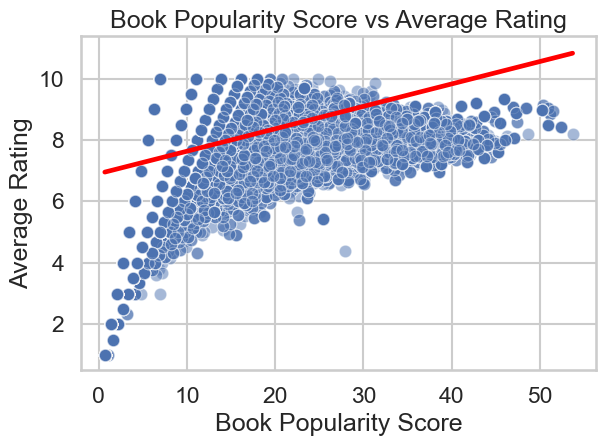

In [137]:
sns.scatterplot(data=merged_df.drop_duplicates('isbn'),
                x='book_popularity_score', y='book_avg_rating', alpha=0.5)
sns.regplot(data=merged_df.drop_duplicates('isbn'),
            x='book_popularity_score', y='book_avg_rating', scatter=False, color='red')
plt.title('Book Popularity Score vs Average Rating')
plt.xlabel('Book Popularity Score')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

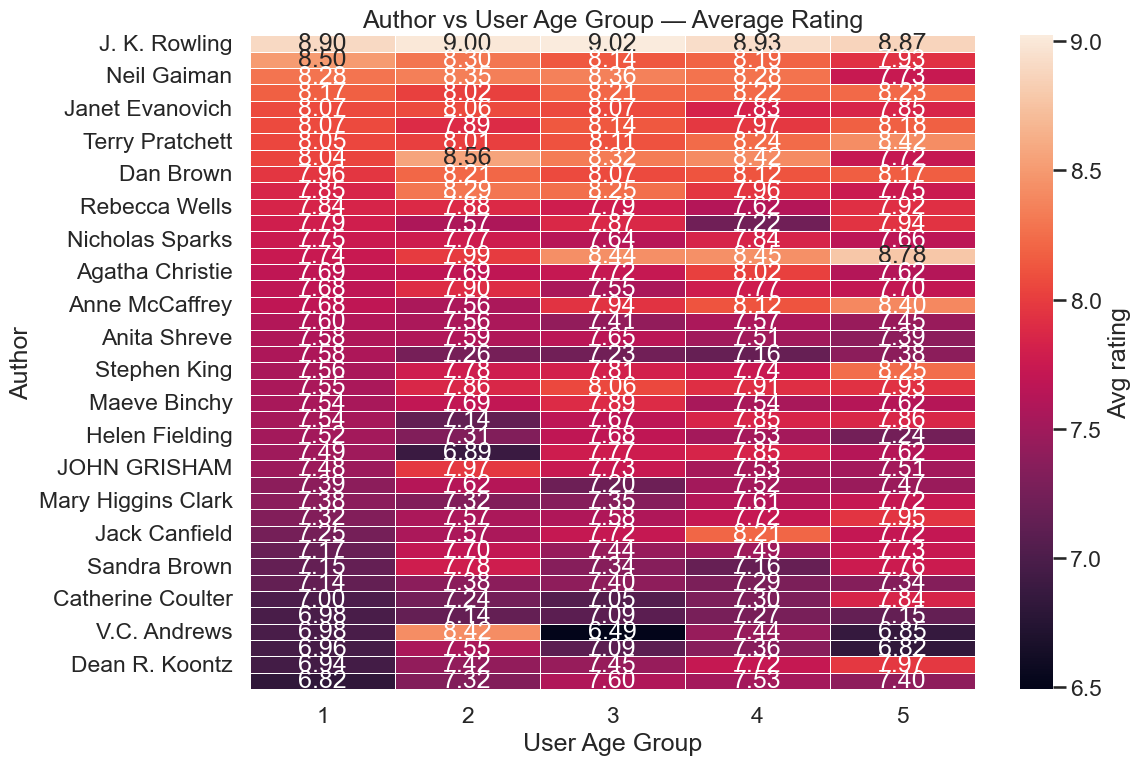

In [138]:
author_age = (
    merged_df.groupby(['book_author', 'User_age_Group'])['book_rating']
    .mean().reset_index()
)
heat = author_age.pivot(index='book_author', columns='User_age_Group', values='book_rating')

# Optional: limit to top authors by number of ratings
top_authors = merged_df.groupby('book_author')['book_rating'].count().nlargest(40).index
heat = heat.reindex(top_authors)

# sort by group 1 if present, otherwise by row mean
sort_col = 1
if sort_col in heat.columns:
    heat = heat.sort_values(by=sort_col, ascending=False)
else:
    heat = heat.assign(_mean=heat.mean(axis=1)).sort_values('_mean', ascending=False).drop(columns=['_mean'])

plt.figure(figsize=(12,8))
sns.heatmap(heat, annot=True, fmt=".2f", linewidths=.4, cbar_kws={'label':'Avg rating'})
plt.title('Author vs User Age Group — Average Rating')
plt.xlabel('User Age Group')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


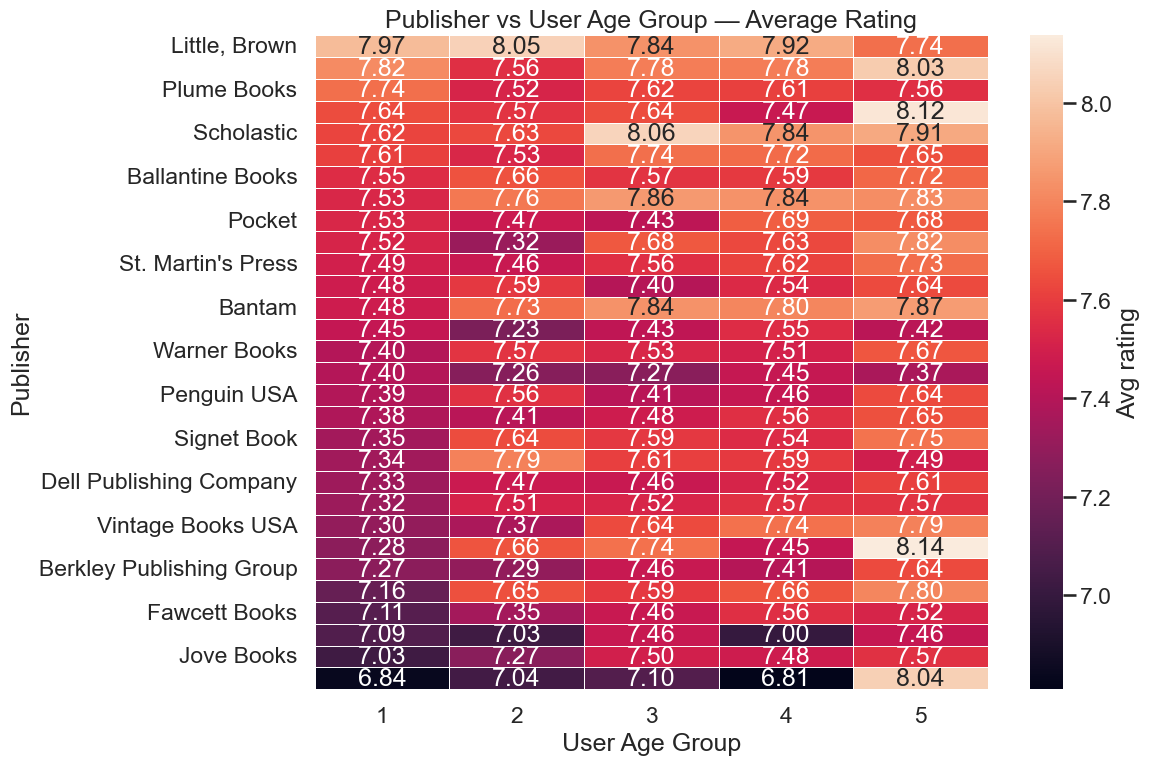

In [139]:
pub_age = (
    merged_df.groupby(['publisher', 'User_age_Group'])['book_rating']
    .mean().reset_index()
)
heat = pub_age.pivot(index='publisher', columns='User_age_Group', values='book_rating')

# limit to most prolific publishers
top_pubs = merged_df.groupby('publisher')['book_rating'].count().nlargest(30).index
heat = heat.reindex(top_pubs)

# sort safely
if 1 in heat.columns:
    heat = heat.sort_values(by=1, ascending=False)
else:
    heat = heat.assign(_mean=heat.mean(axis=1)).sort_values('_mean', ascending=False).drop(columns=['_mean'])

plt.figure(figsize=(12,8))
sns.heatmap(heat, annot=True, fmt=".2f", linewidths=.4, cbar_kws={'label':'Avg rating'})
plt.title('Publisher vs User Age Group — Average Rating')
plt.xlabel('User Age Group')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()
